In [6]:
import npc_sessions
import numpy as np
import matplotlib.pyplot as plt

In [10]:
units = npc_sessions.get_units_electrodes('626791_2022-08-17')
units['structure_acronym'].unique(), units['structure_layer'].unique()

(array(['PoT', 'SGN', 'LP', 'root', 'DG', 'CA1', 'dhc', 'alv', 'fp',
        'VISam', 'VISp', 'AUDpo', 'TEa', 'VISli', 'VISl', 'or', 'CP',
        'ccg', 'scwm', 'MOp', 'MOs'], dtype=object),
 array(['PoT', 'SGN', 'LP', 'root', 'DG-mo', 'DG-sg', 'CA1', 'dhc', 'alv',
        'fp', 'VISam6b', 'VISam6a', 'VISam5', 'VISam4', 'VISam2/3',
        'VISp5', 'VISp6b', 'VISp6a', 'VISp4', 'VISp2/3', 'AUDpo6a',
        'TEa6b', 'TEa6a', 'TEa5', 'VISli5', 'VISli4', 'VISl4', 'VISl2/3',
        'or', 'CP', 'ccg', 'scwm', 'MOp6a', 'MOp5', 'MOp2/3', 'MOs2/3'],
       dtype=object))

In [3]:
spike_times = npc_sessions.get_unit_spike_times_dict('636766_20230124', tuple(units['unit_name']))
spike_times

{'e0984cc5-af22-4d1c-90b9-6ae0bba4a590': array([   7.10708245,    8.07877977,    8.46007871, ..., 4885.70986089,
        4885.80416063, 4885.84059387]),
 '9800cb40-f4c3-4ad9-a0d2-8a61d71e71b3': array([   6.09881858,    6.14881844,    6.20101829, ..., 4888.40645344,
        4888.42342006, 4888.43082004]),
 '25232cd4-4a02-4e3e-a720-8270347e4269': array([   6.11018521,    6.5006508 ,    6.72405018, ..., 4886.05699327,
        4886.9017576 , 4888.16315411]),
 'c097894a-90a7-4ad4-83ea-07c1596a37da': array([   6.15515175,    6.19558497,    6.42145102, ..., 4888.68601933,
        4888.70568595, 4888.75691914]),
 'bb900b43-9c7e-4064-b87e-a495fb387546': array([   6.14661844,    6.34045124,    6.38928444, ..., 4888.43585336,
        4888.66038607, 4888.80635233]),
 '36be9a0a-4af3-4a31-a22c-de4c8ee021d2': array([   6.08645194,    6.09991857,    6.1271185 , ..., 4885.56259464,
        4885.59076122, 4888.03732113]),
 '1649860b-e395-4acb-a872-39a96b05ff7d': array([   6.18585167,    6.24391817,    6

In [5]:
len(units) == len(spike_times)

True

626791_2022-08-15: ValueError('No units data assets found for session 626791_2022-08-15')
626791_2022-08-16: units available
626791_2022-08-17: units available
636766_2023-01-23: units available
636766_2023-01-24: units available
636766_2023-01-25: units available
636766_2023-01-26: TypeError("Can only merge Series or DataFrame objects, a <class 'NoneType'> was passed")
644864_2023-01-30: units available
644864_2023-01-31: units available
644864_2023-02-01: units available
644864_2023-02-02: units available
660023_2023-08-08: units available
660023_2023-08-09: units available
666986_2023-08-14: ValueError('No units data assets found for session 666986_2023-08-14')
666986_2023-08-15: units available
666986_2023-08-16: units available
666986_2023-08-17: units available
662892_2023-08-21: units available
662892_2023-08-22: units available
662892_2023-08-23: units available
662892_2023-08-24: ValueError('No units data assets found for session 662892_2023-08-24')
668755_2023-08-28: units av

Missing first diode flip


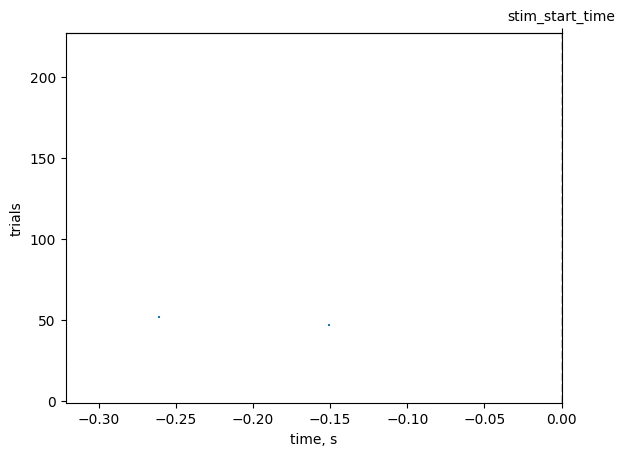

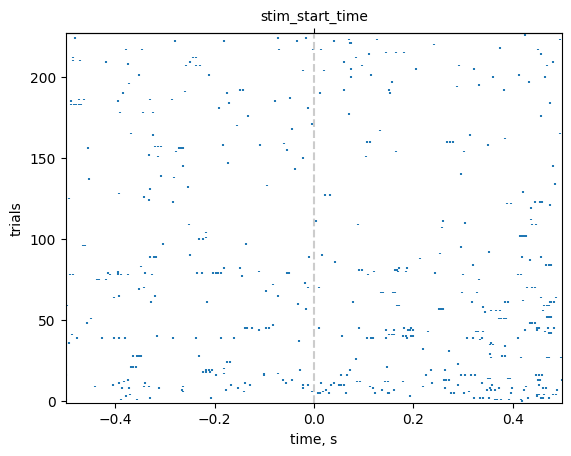

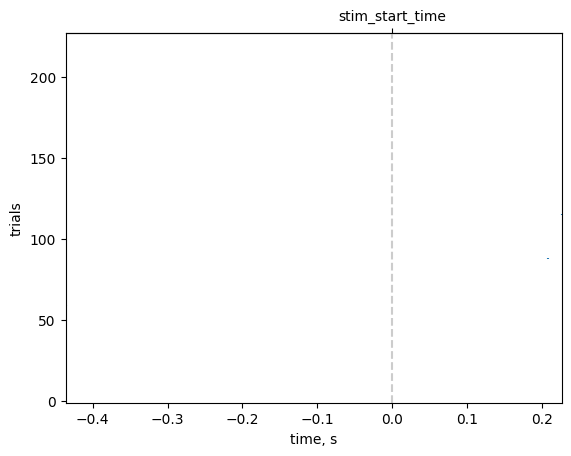

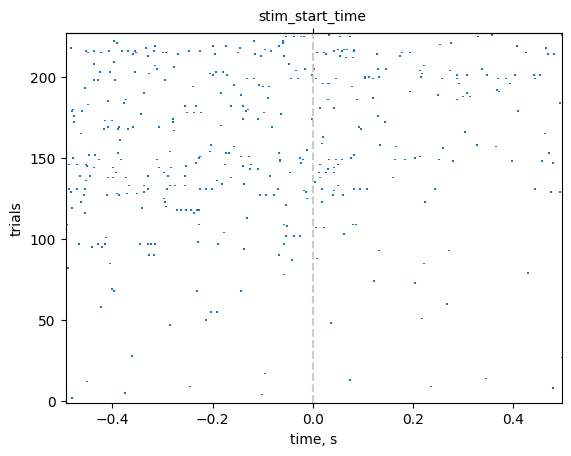

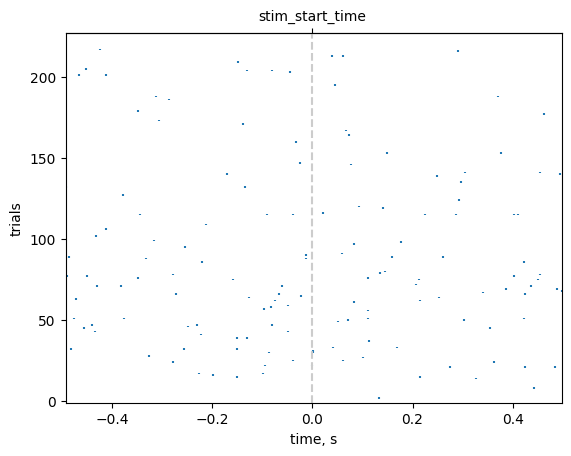

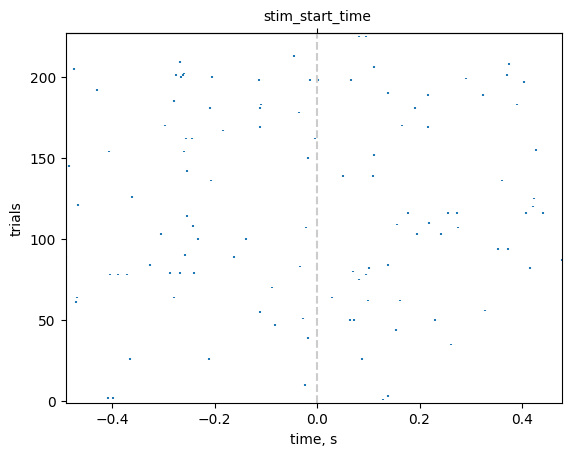

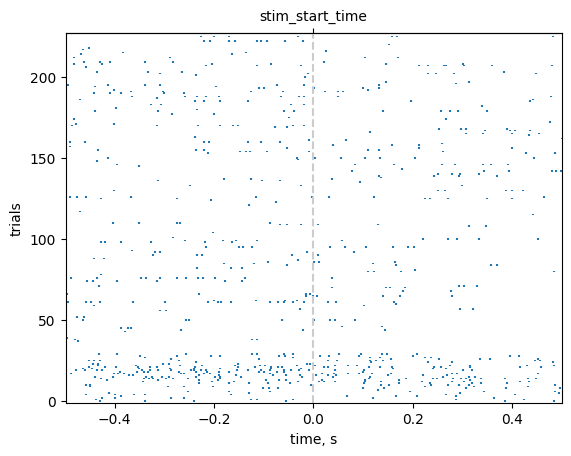

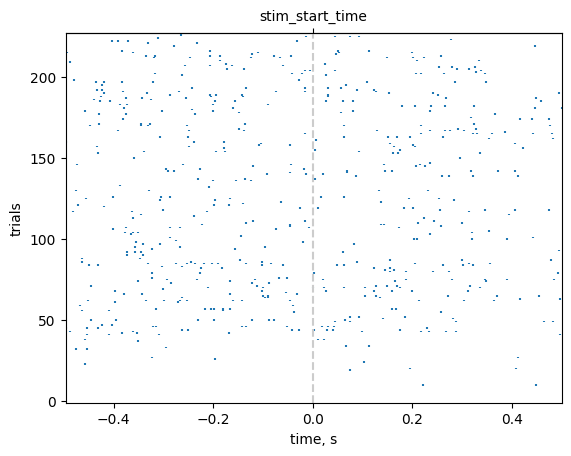

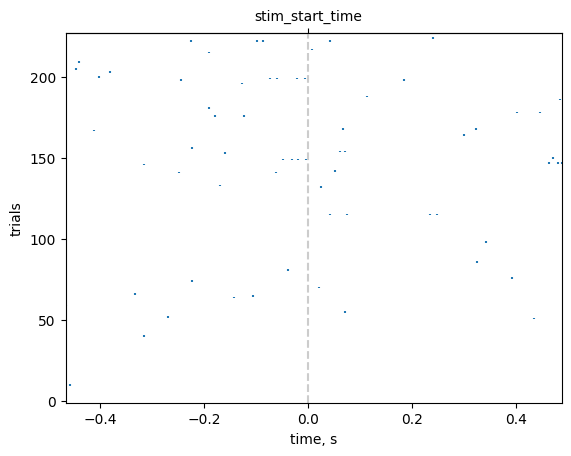

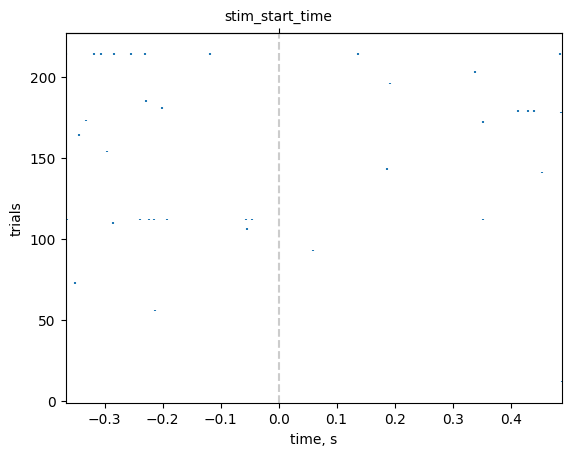

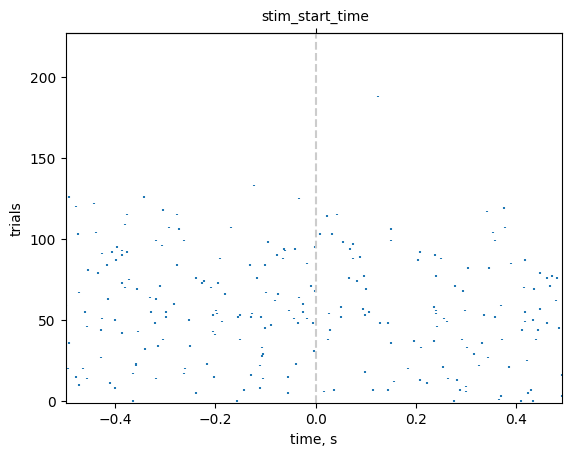

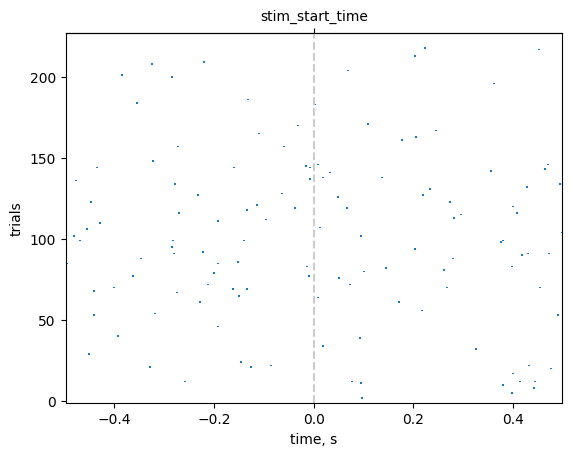

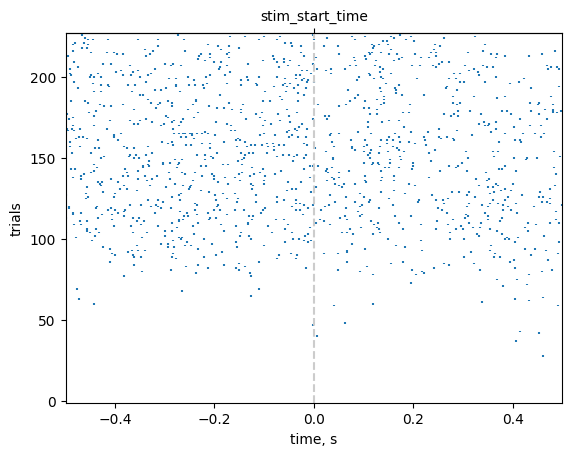

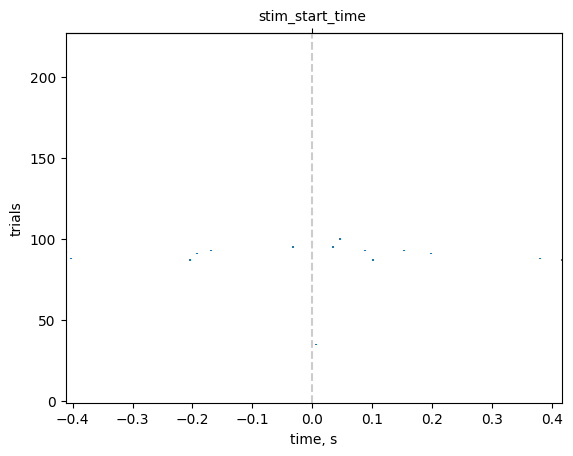

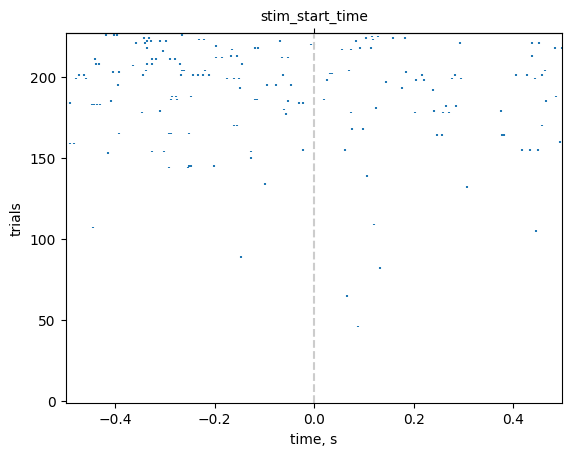

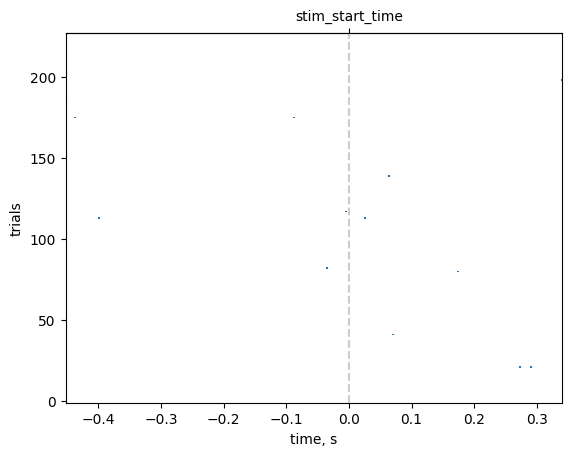

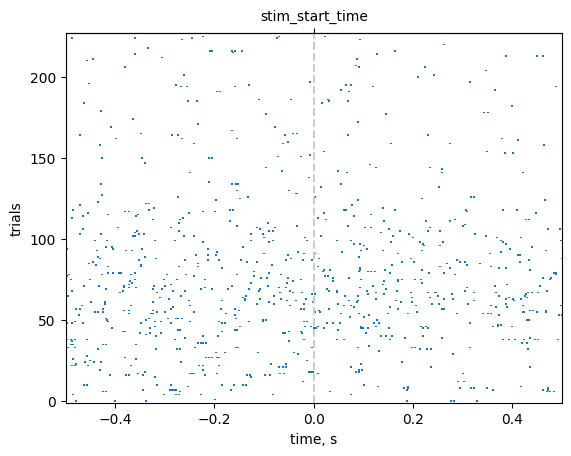

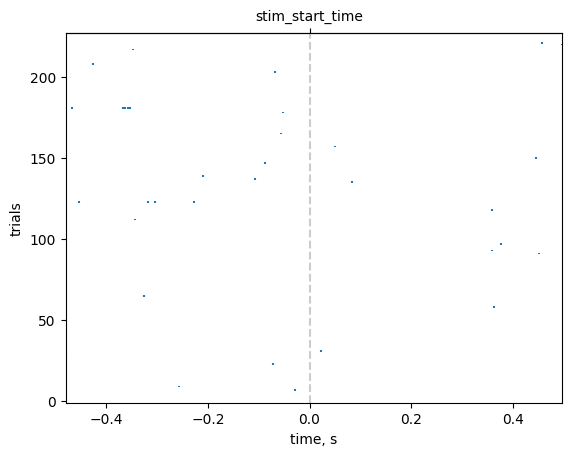

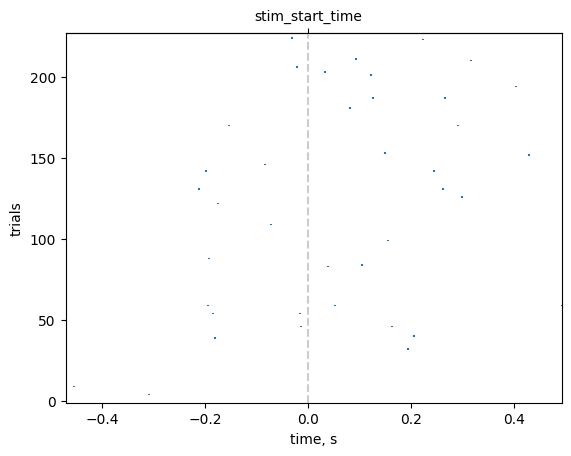

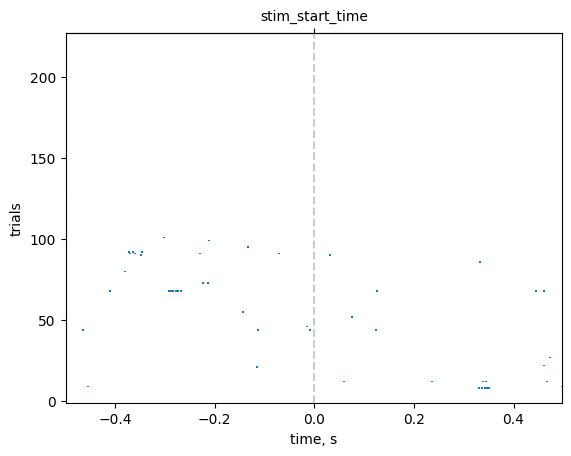

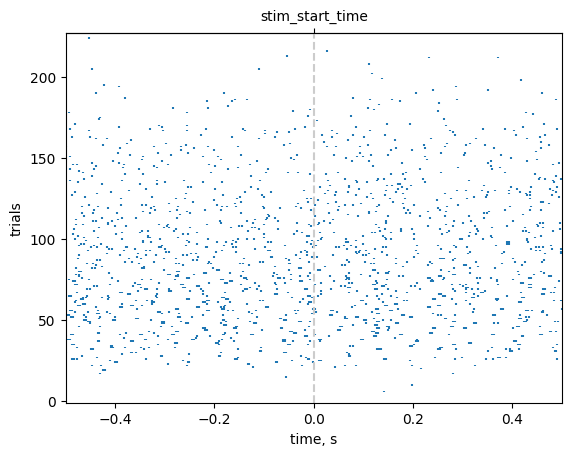

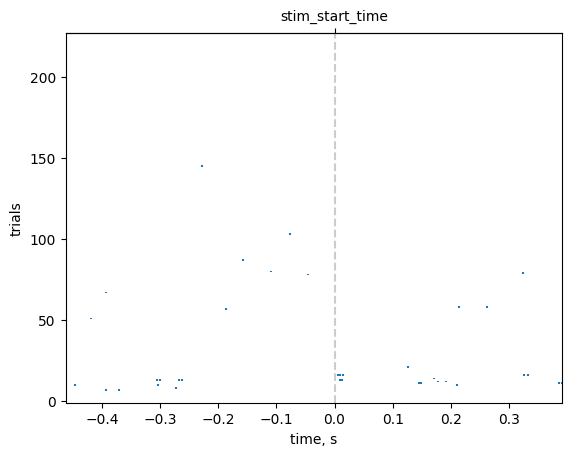

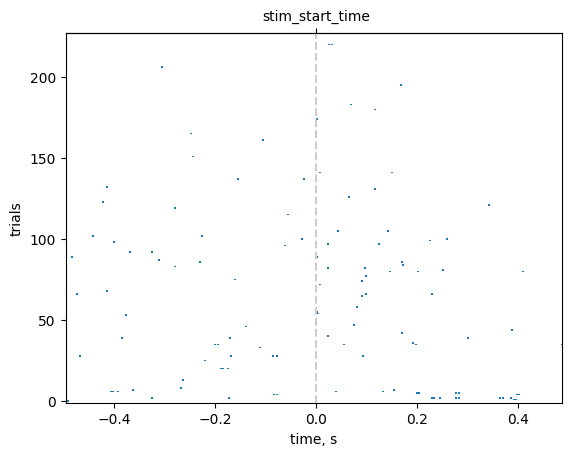

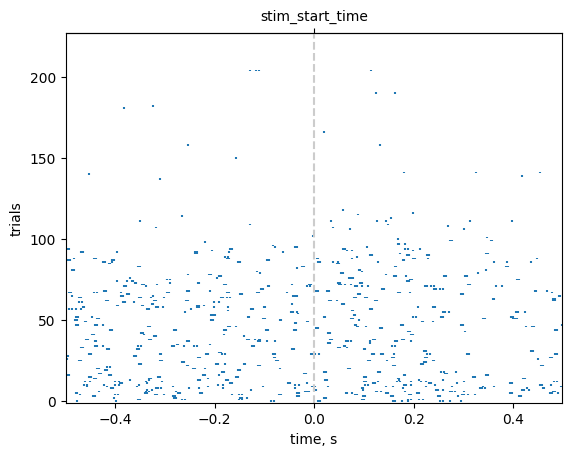

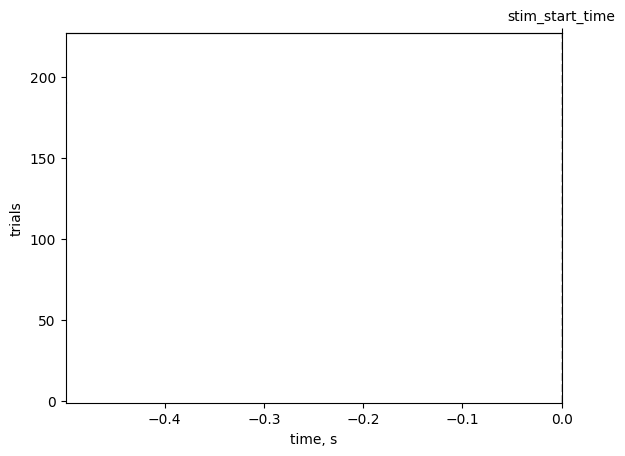

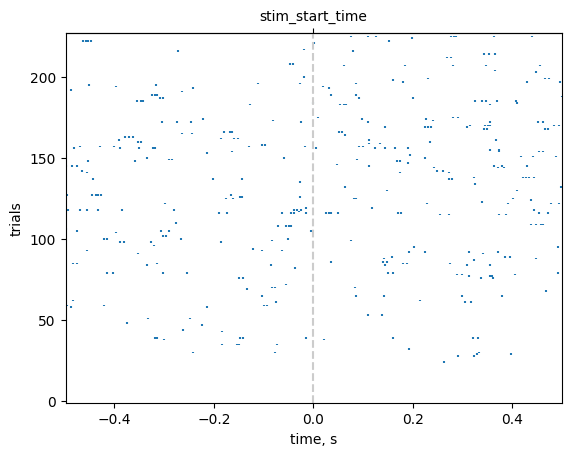

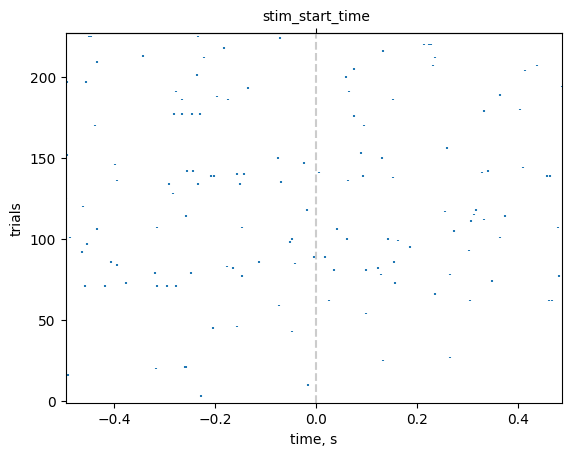

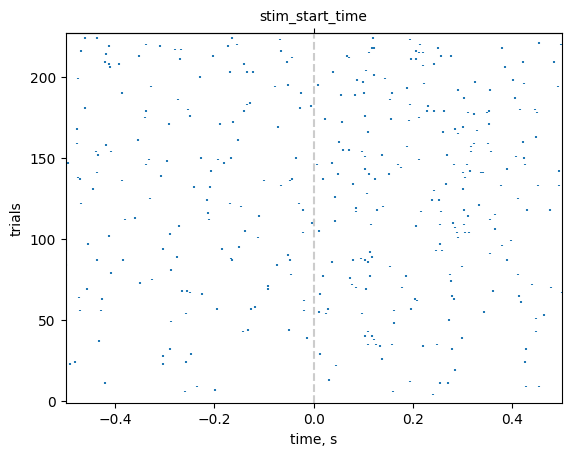

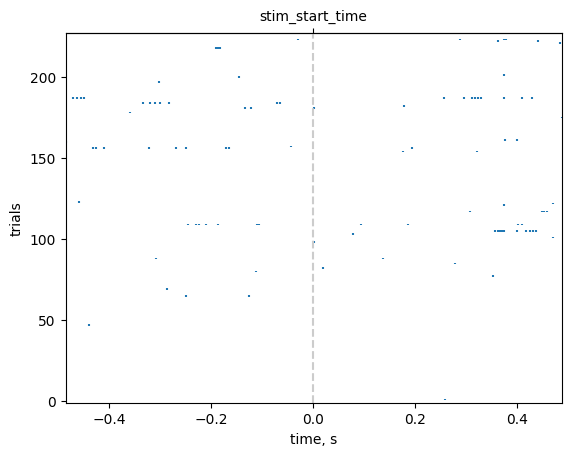

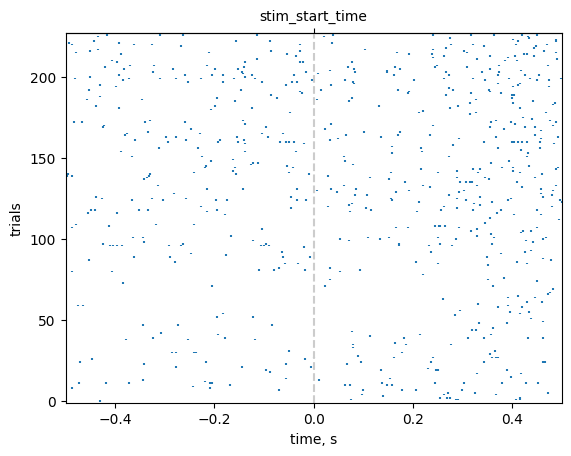

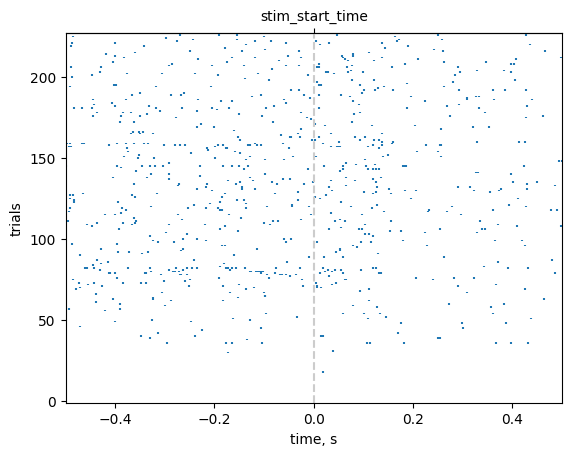

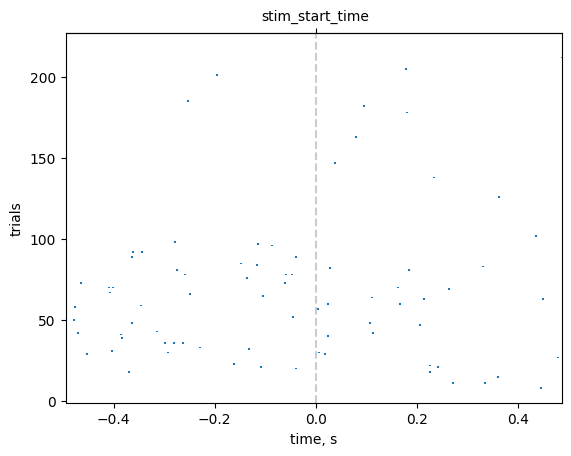

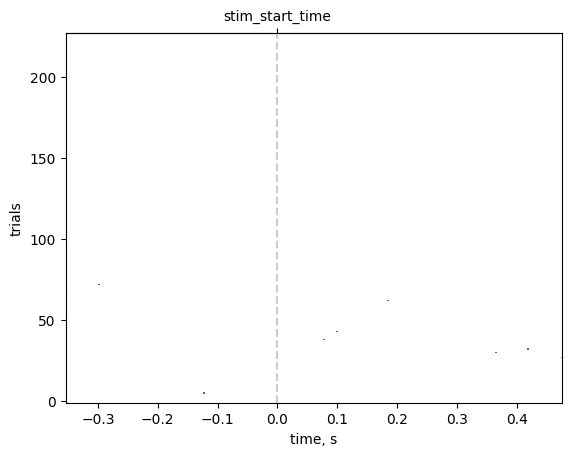

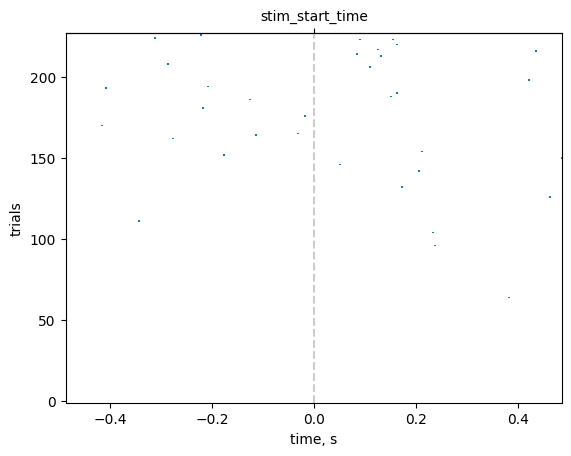

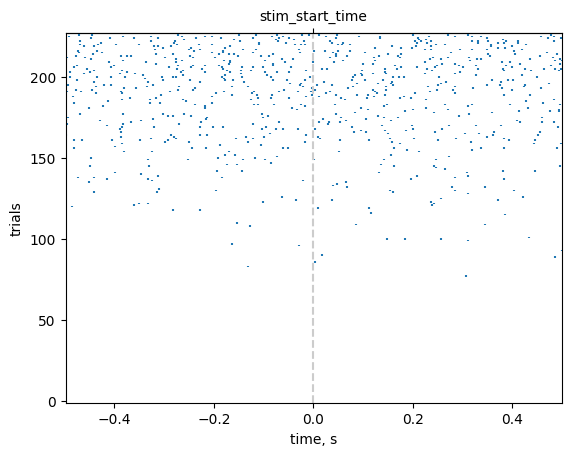

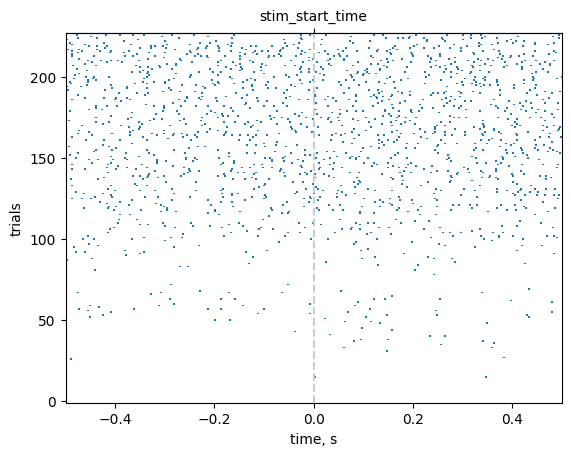

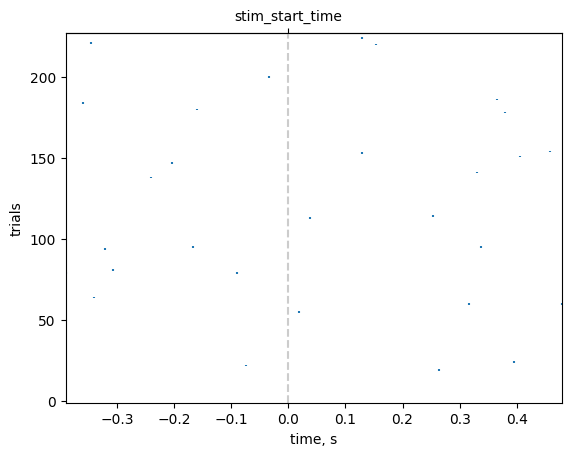

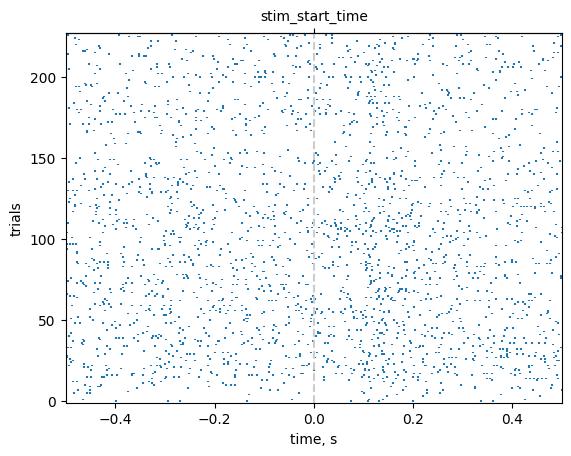

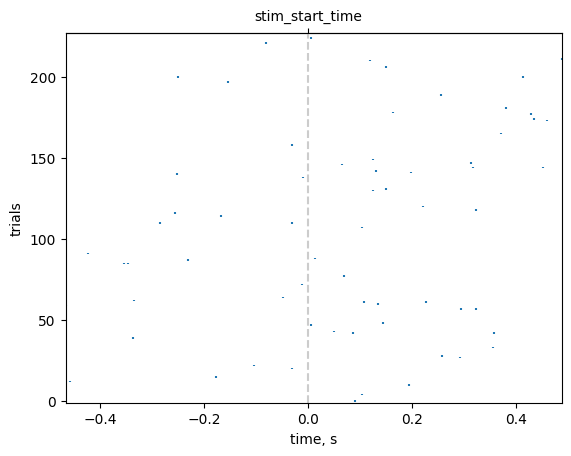

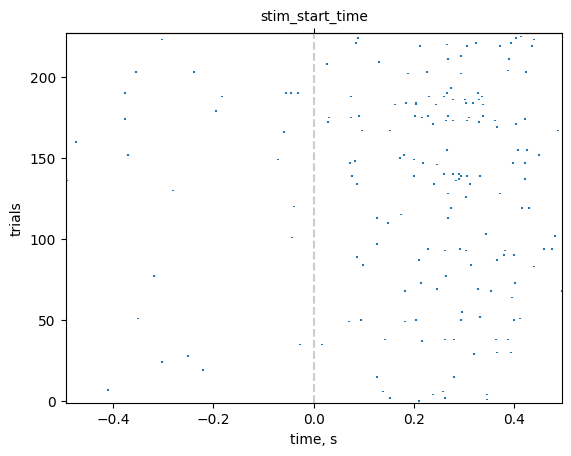

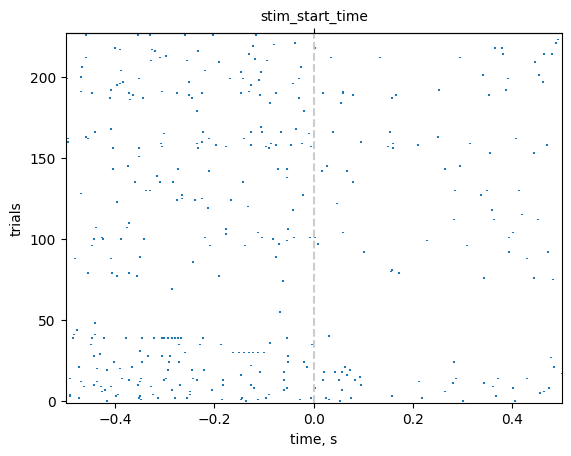

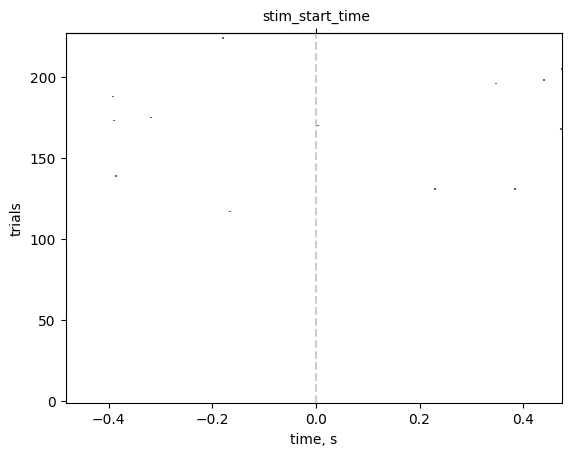

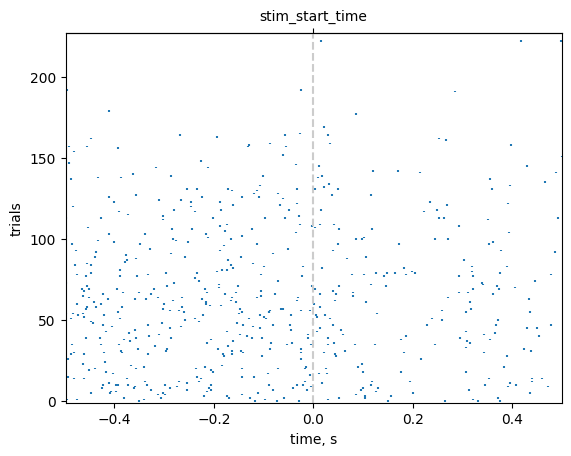

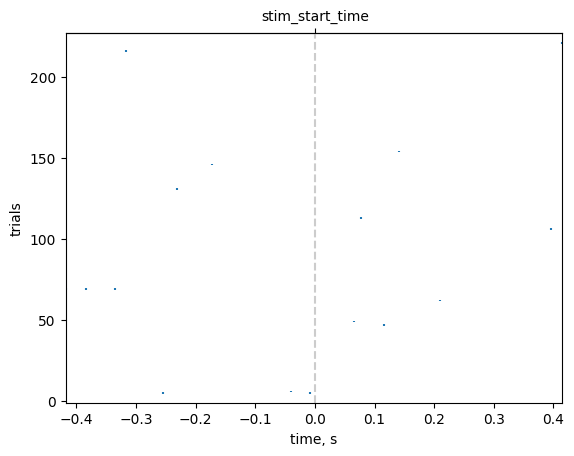

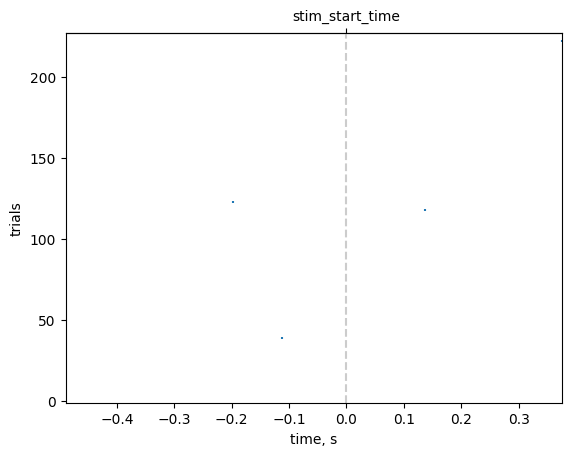

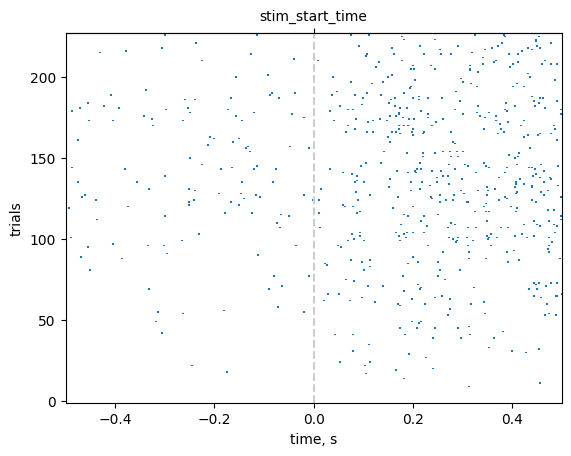

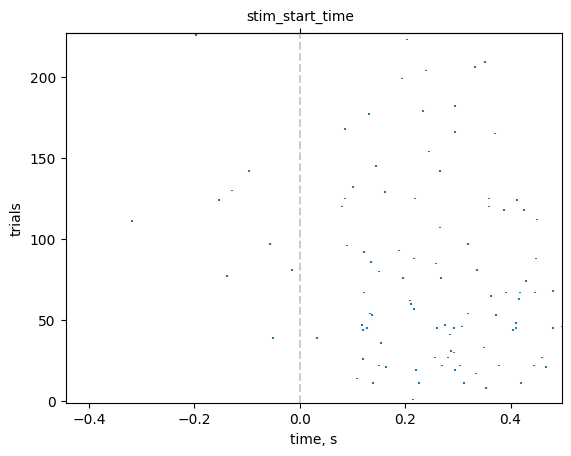

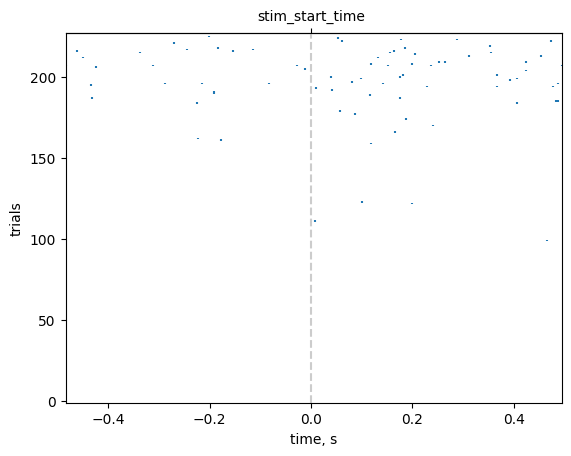

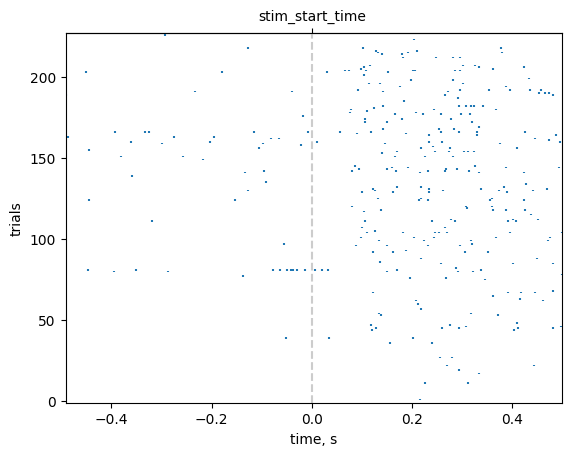

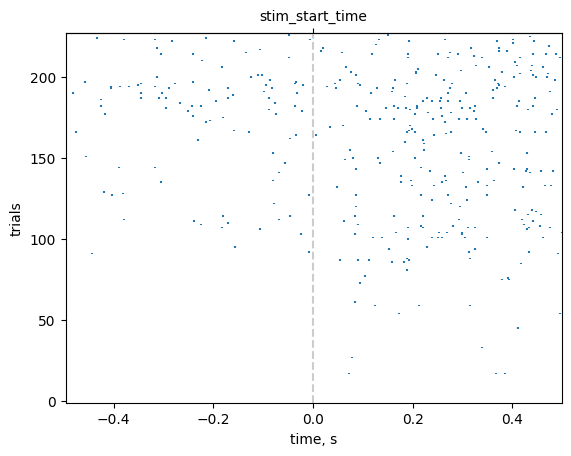

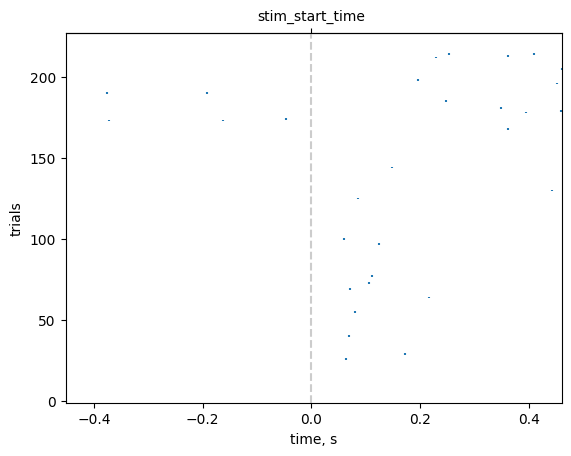

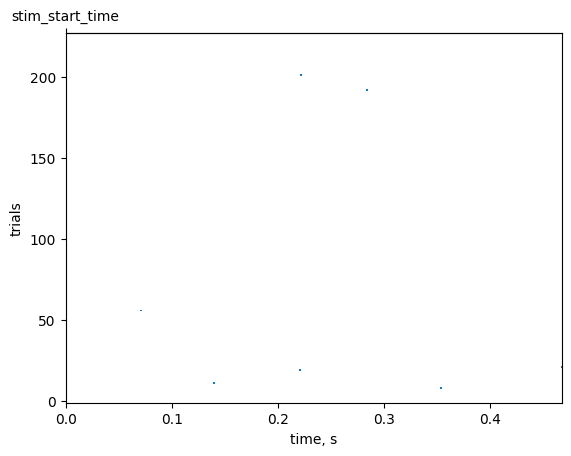

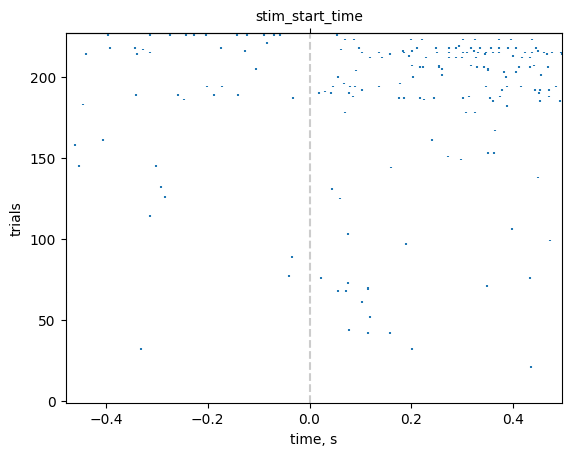

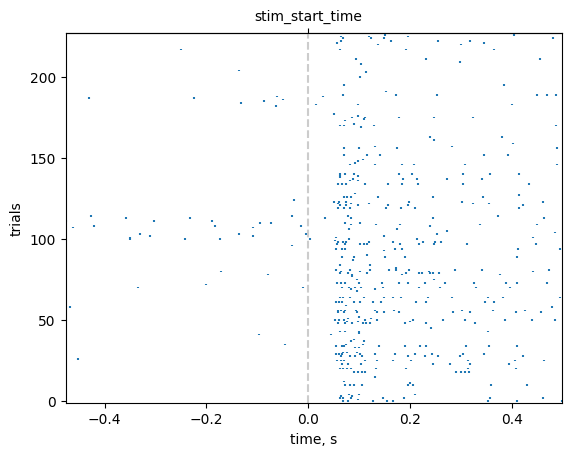

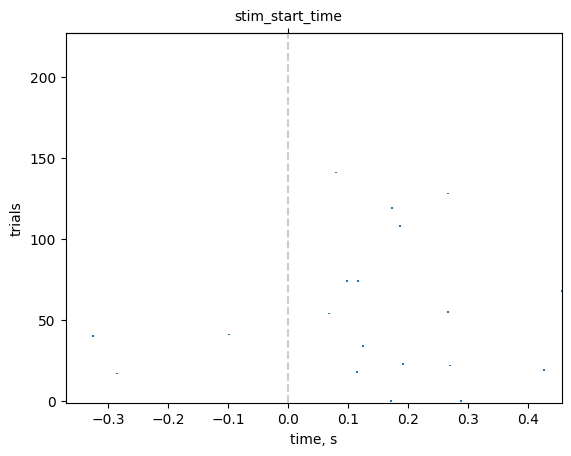

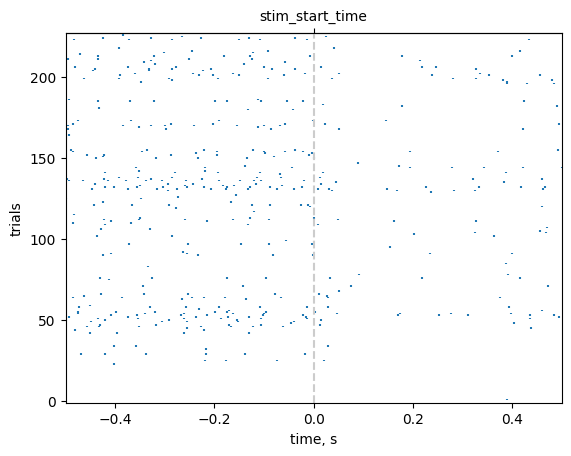

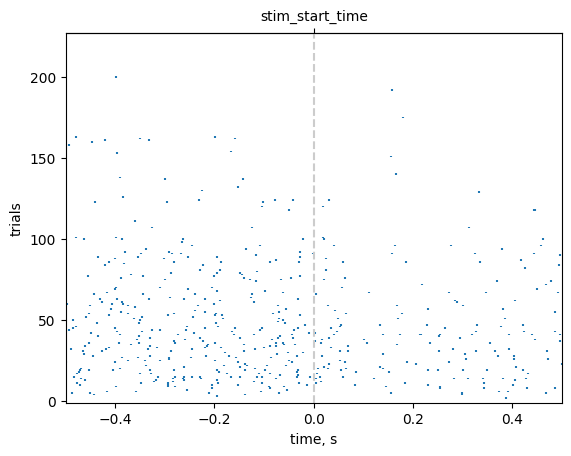

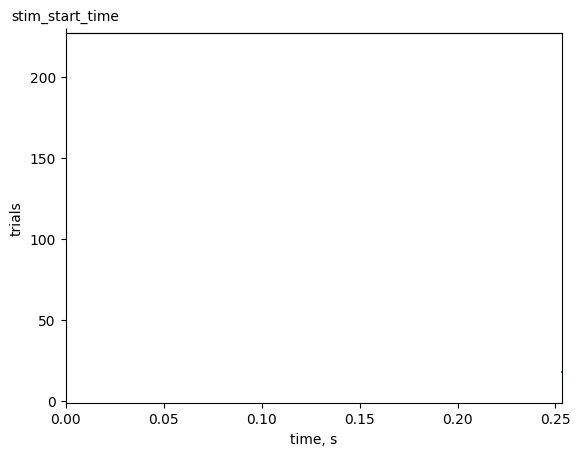

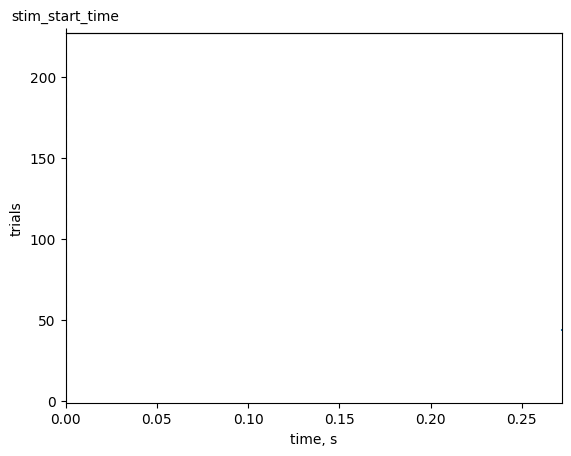

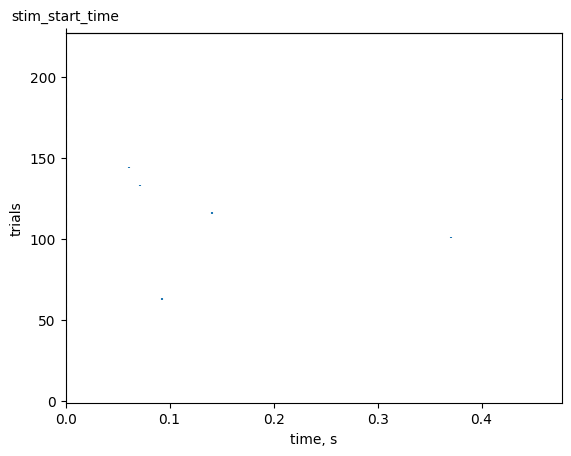

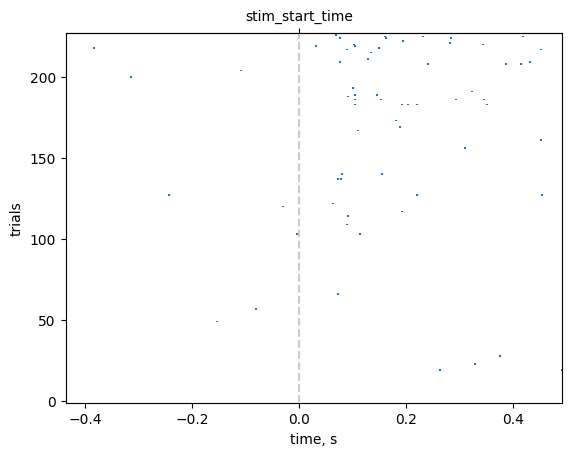

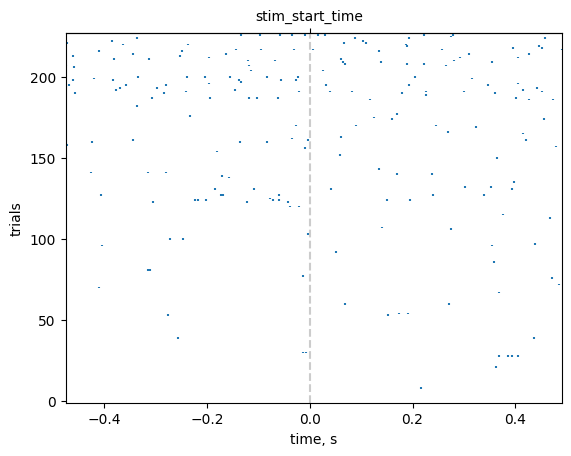

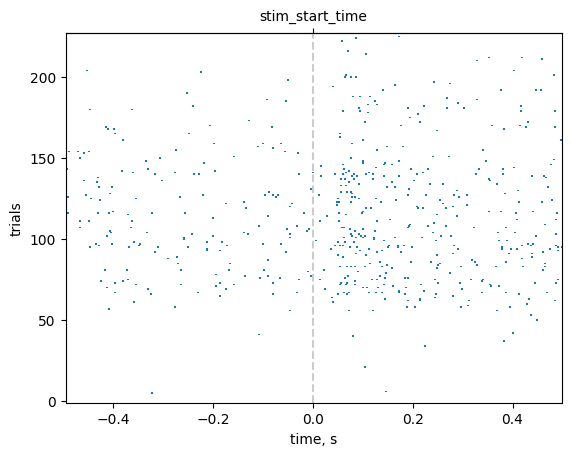

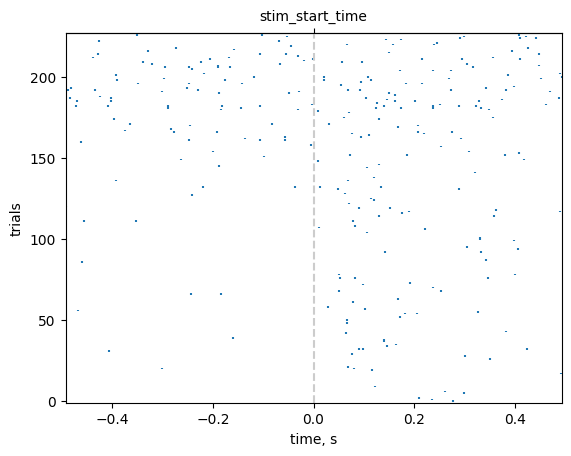

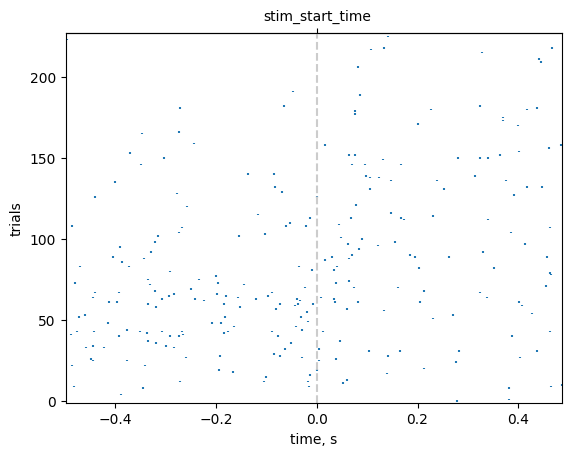

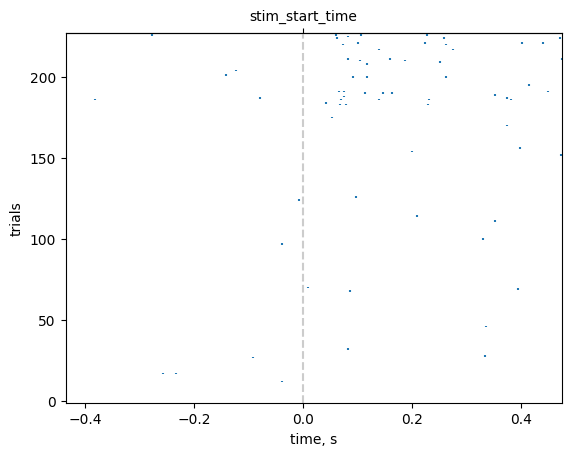

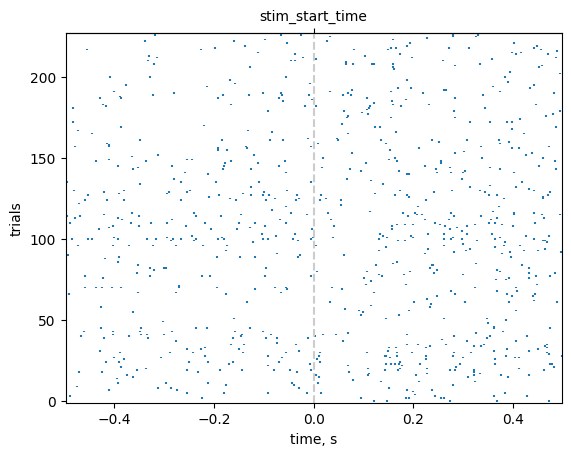

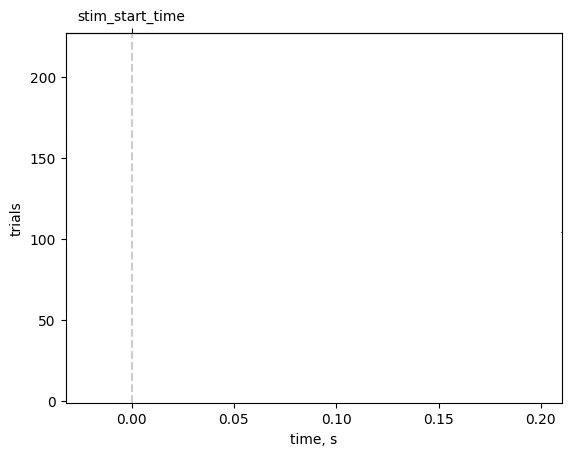

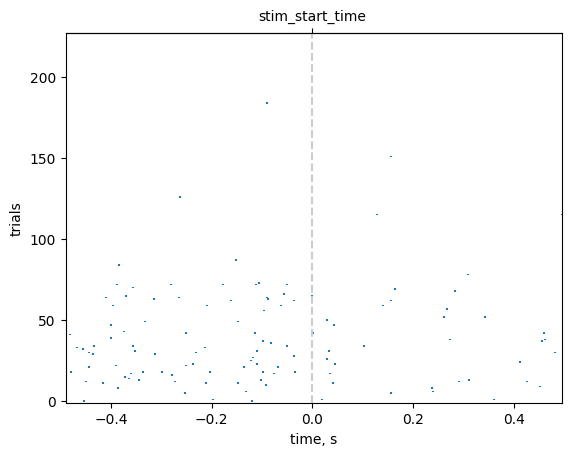

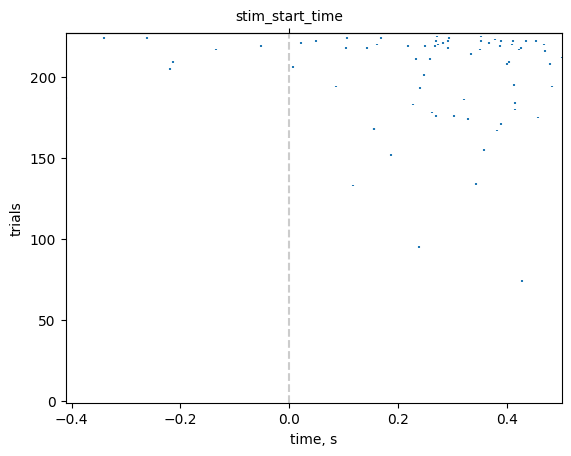

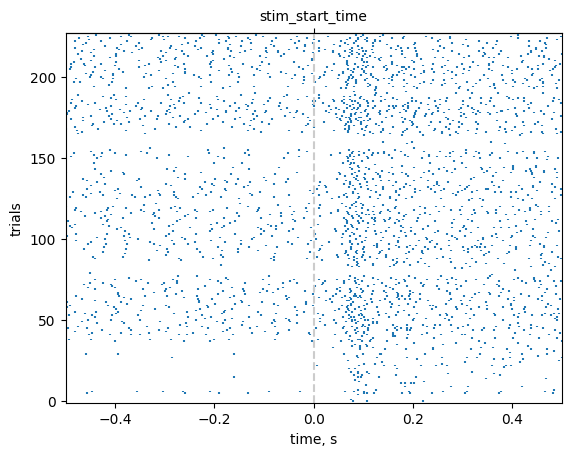

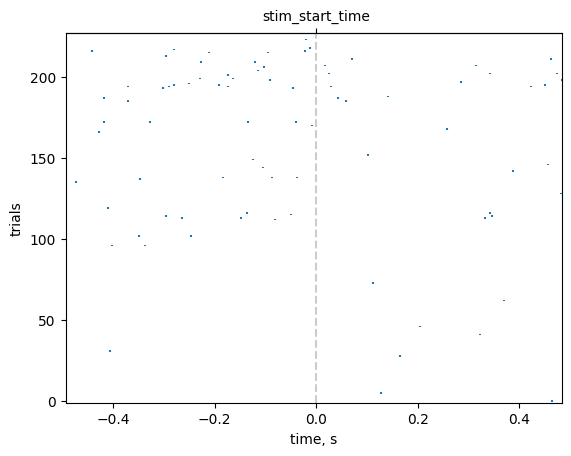

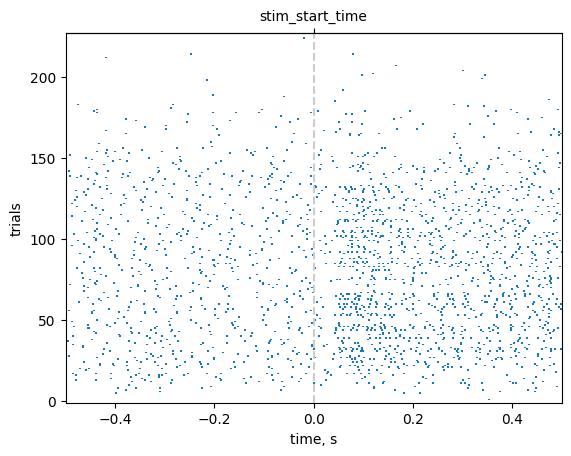

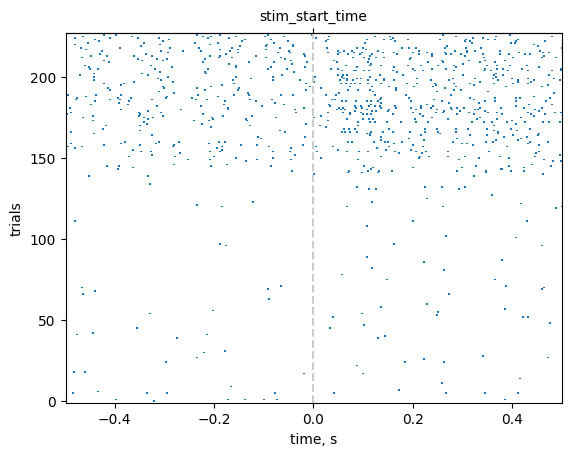

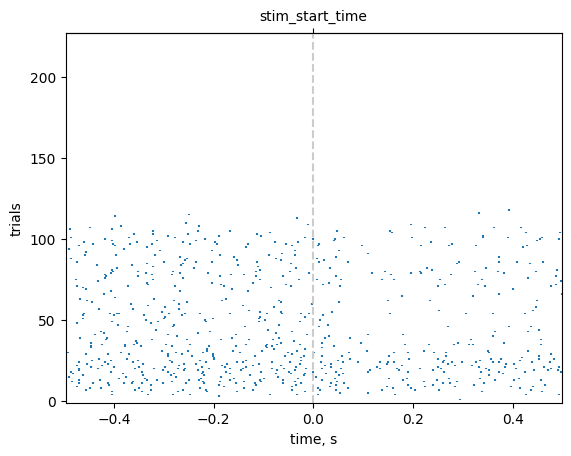

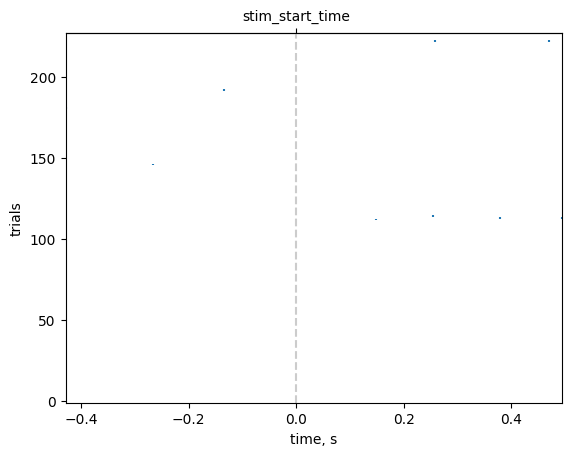

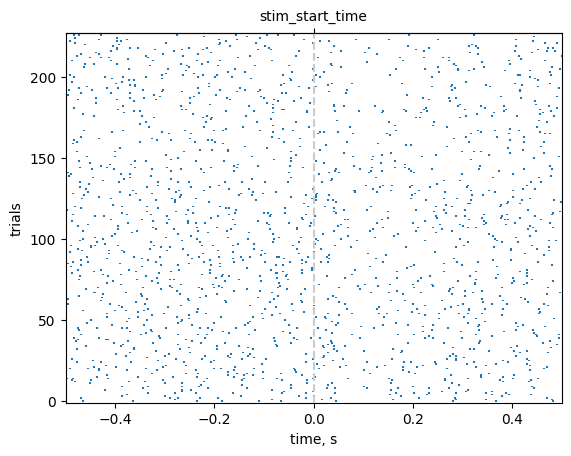

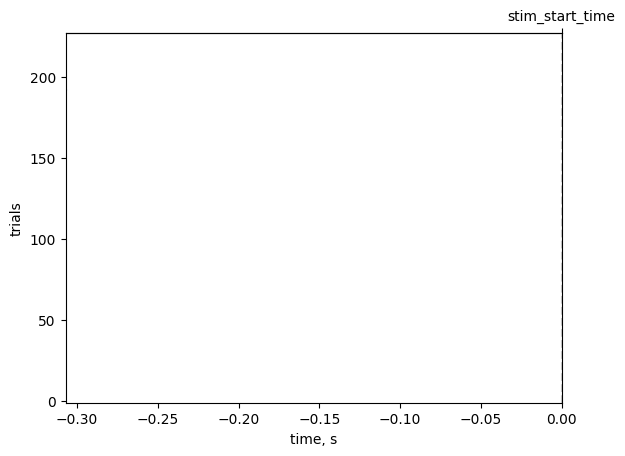

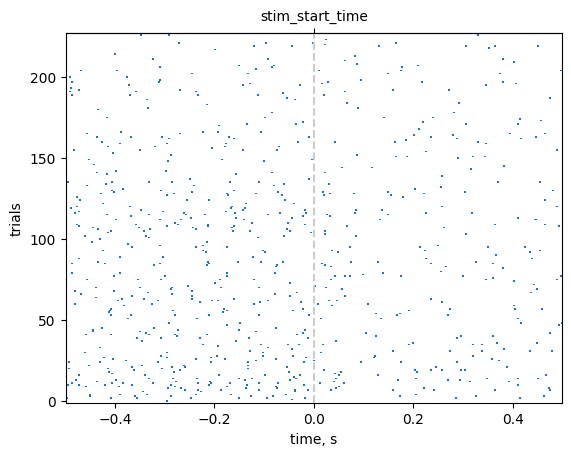

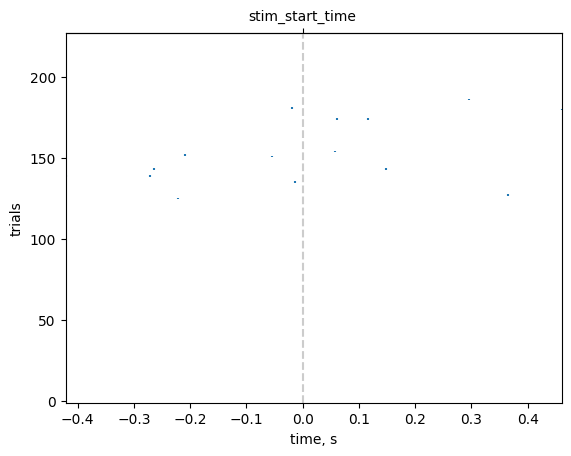

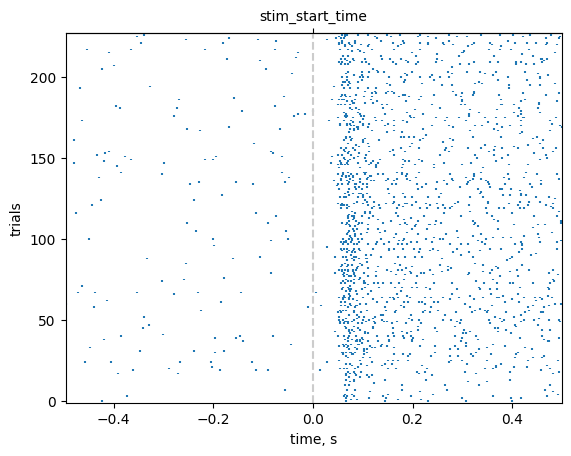

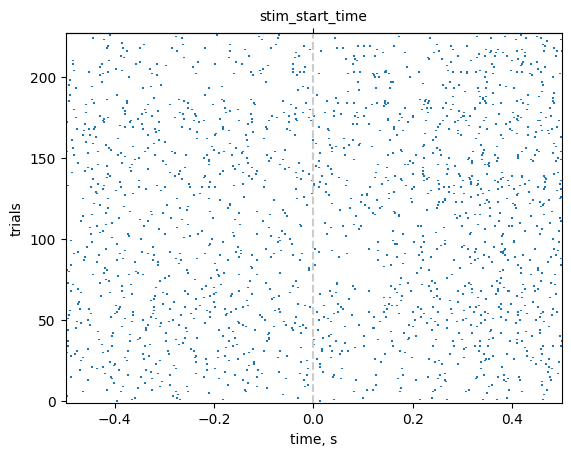

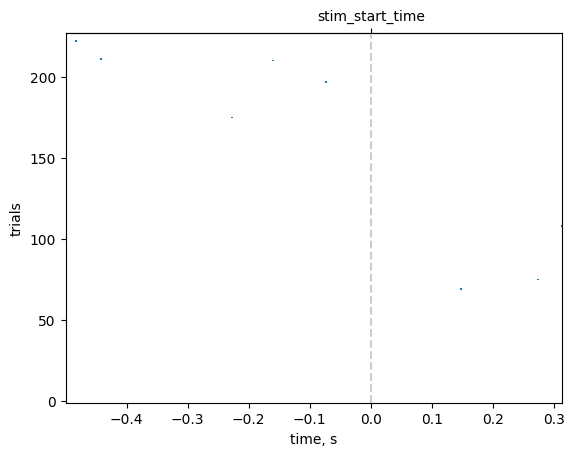

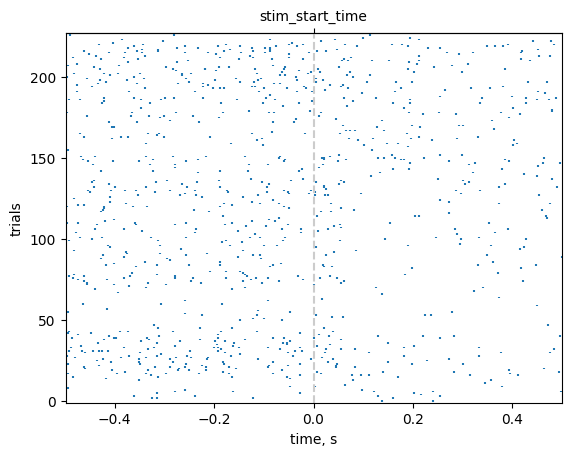

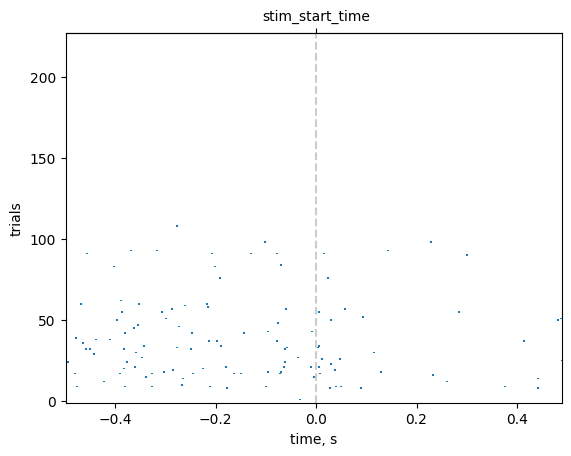

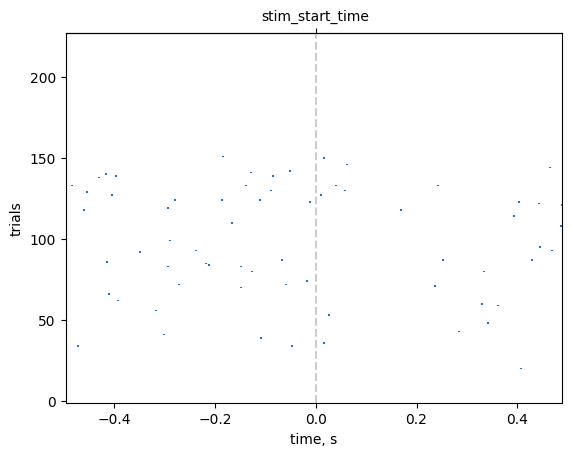

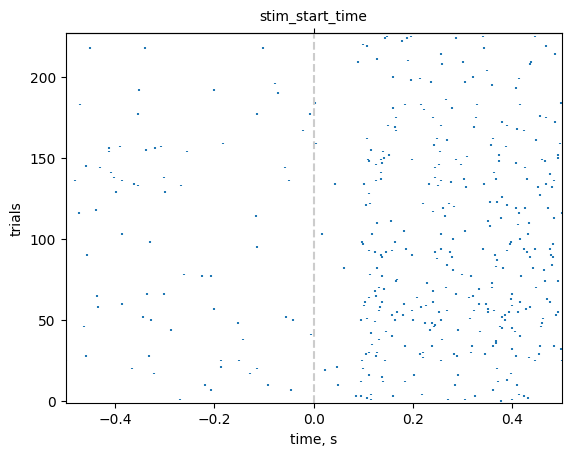

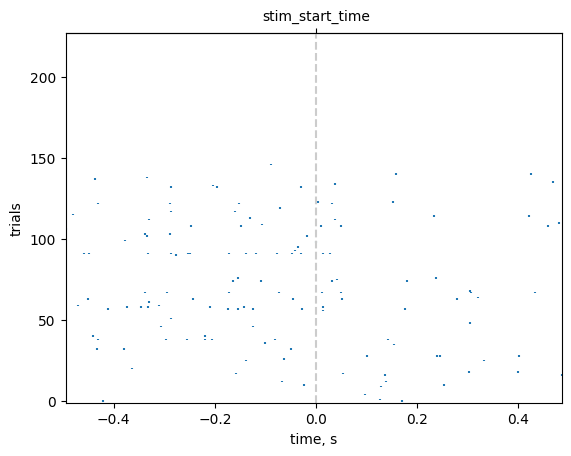

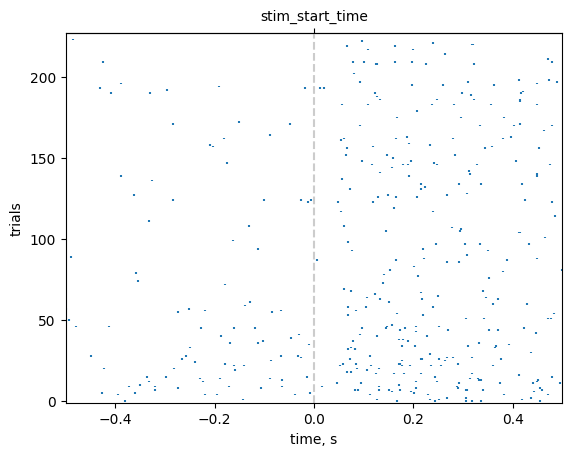

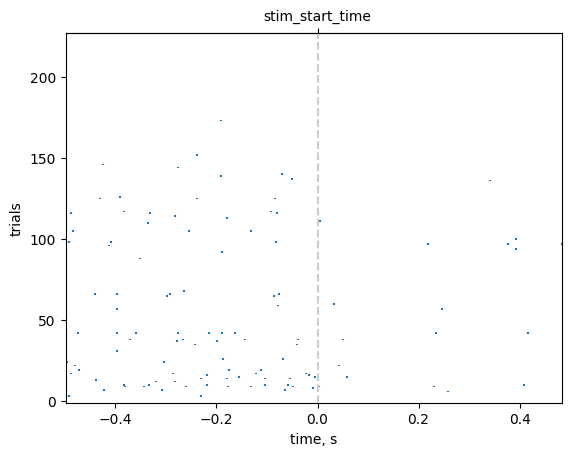

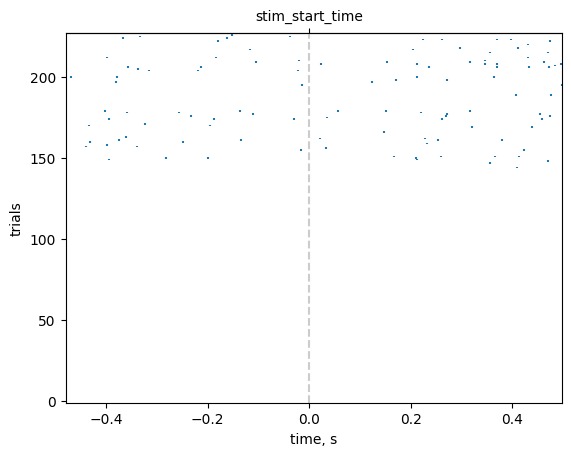

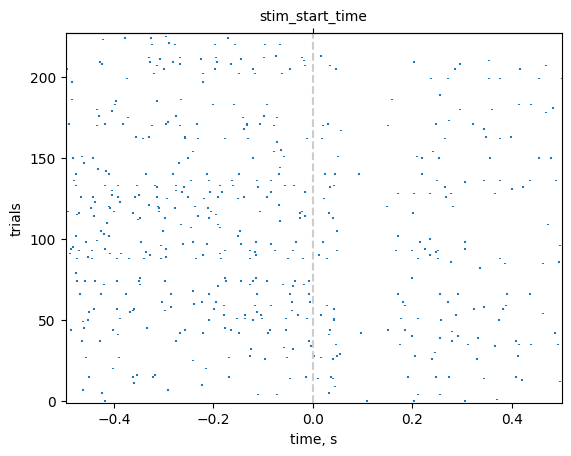

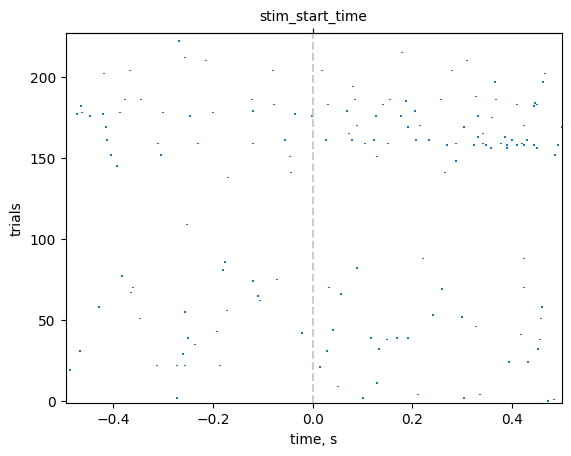

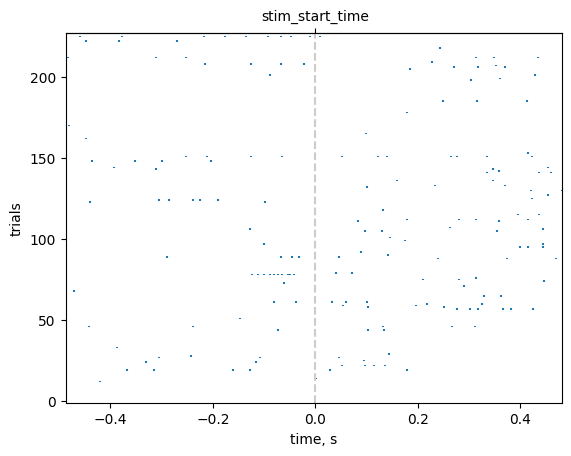

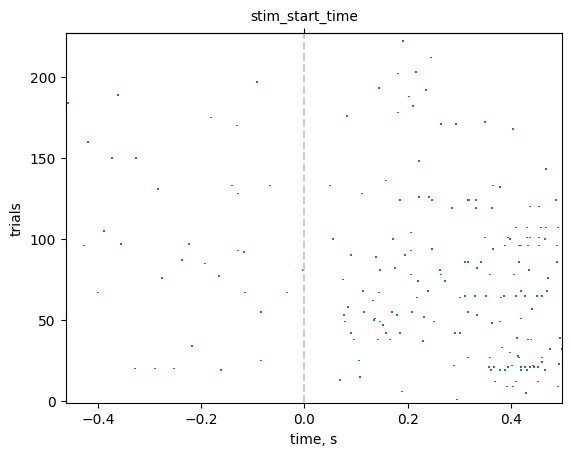

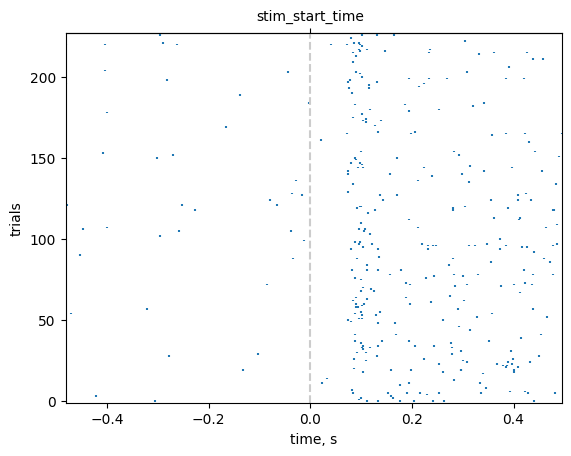

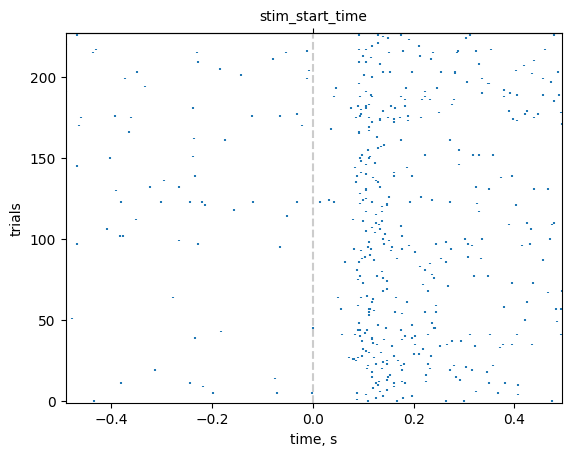

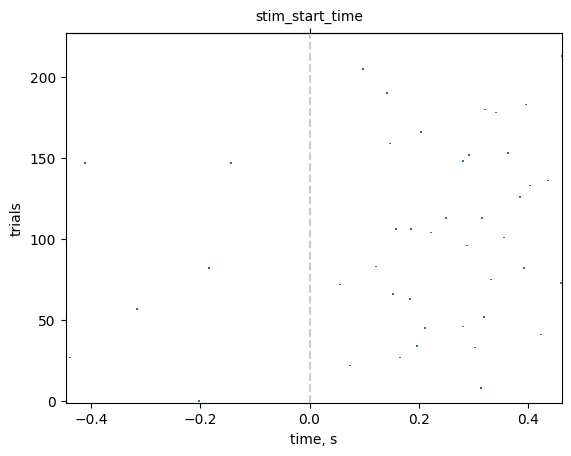

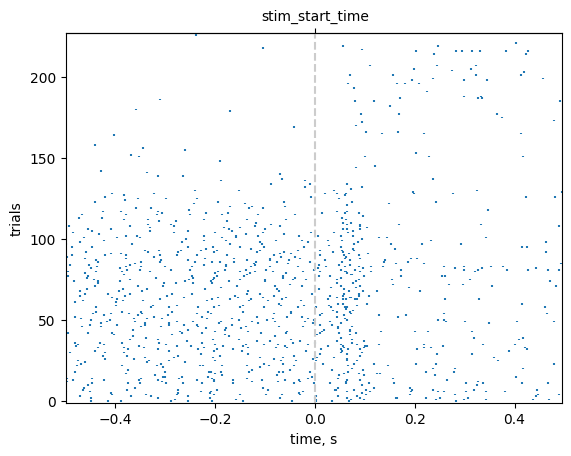

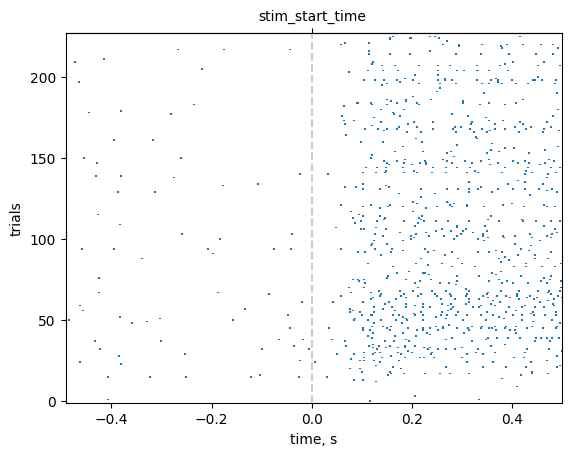

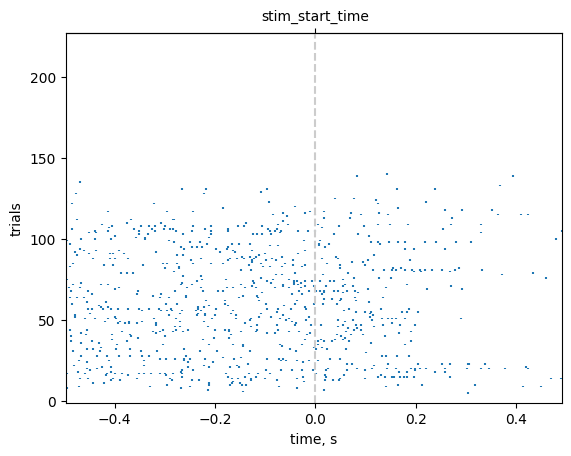

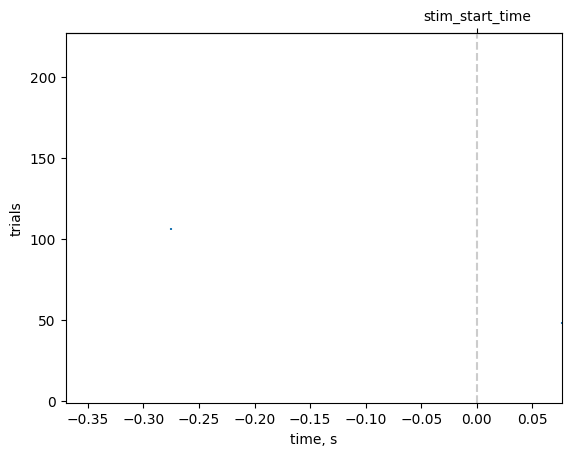

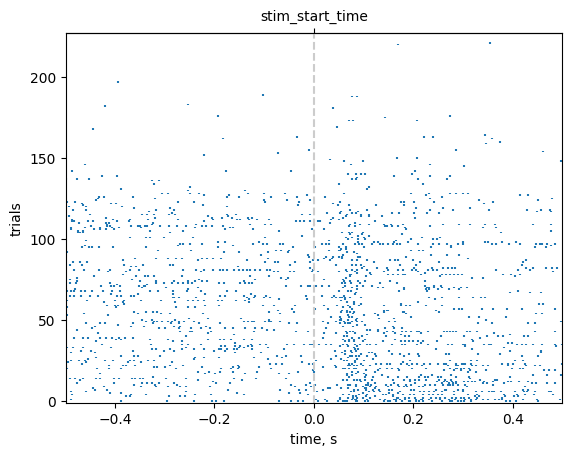

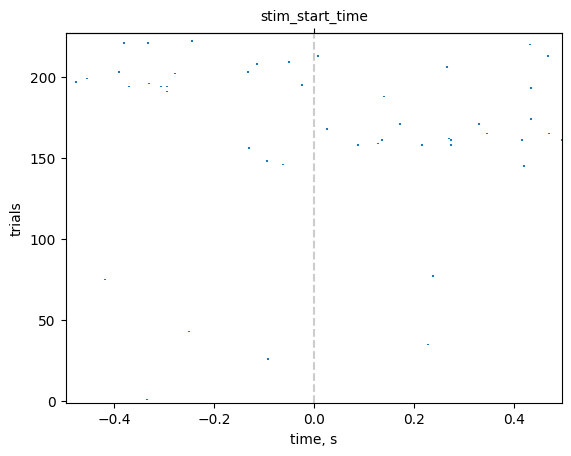

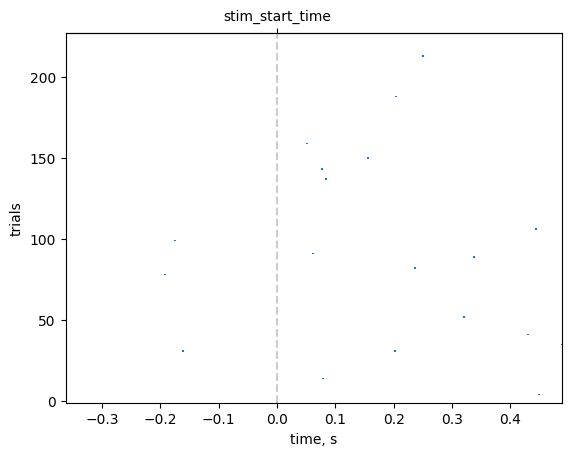

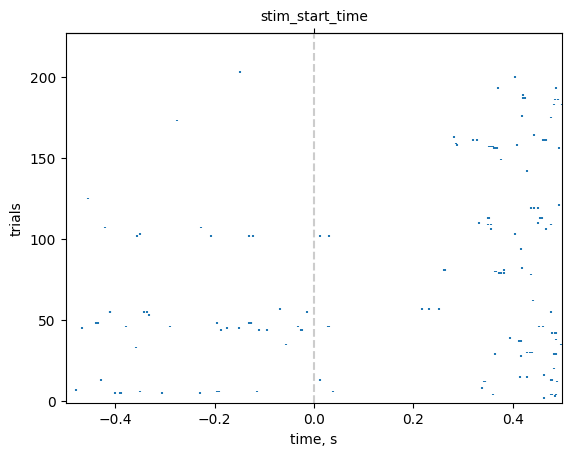

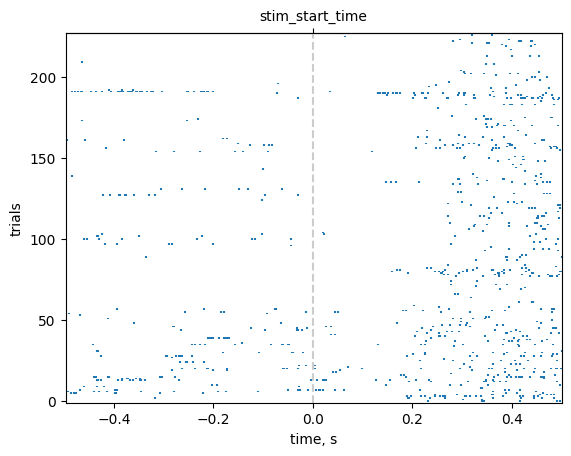

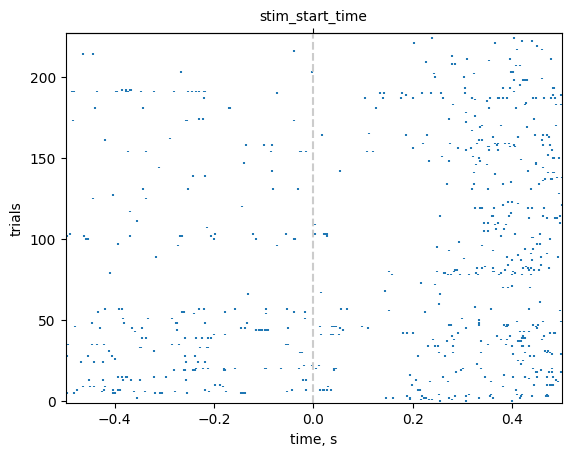

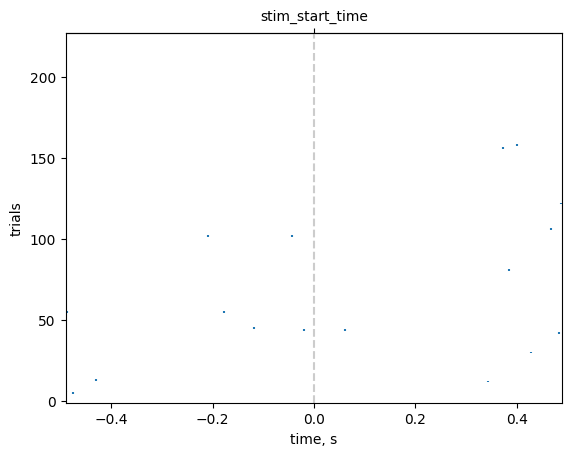

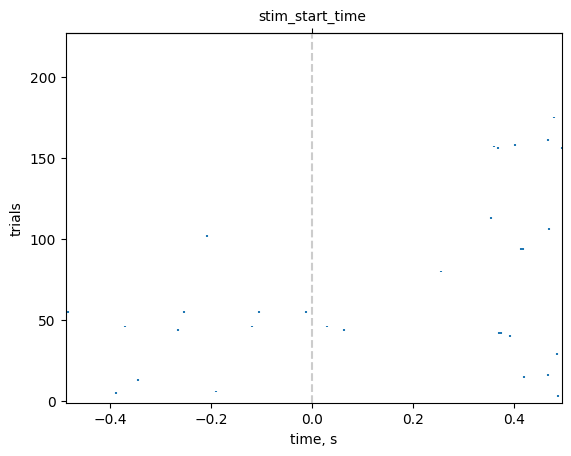

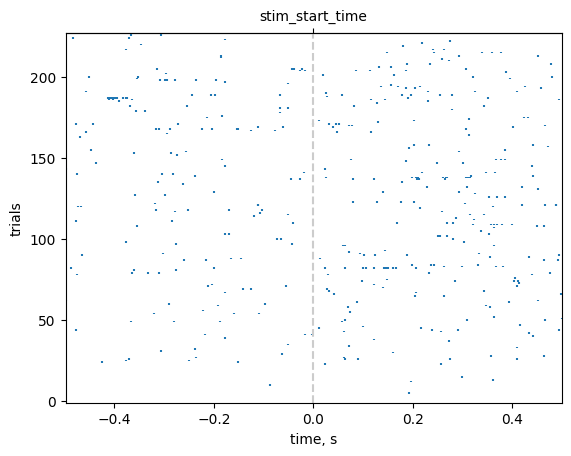

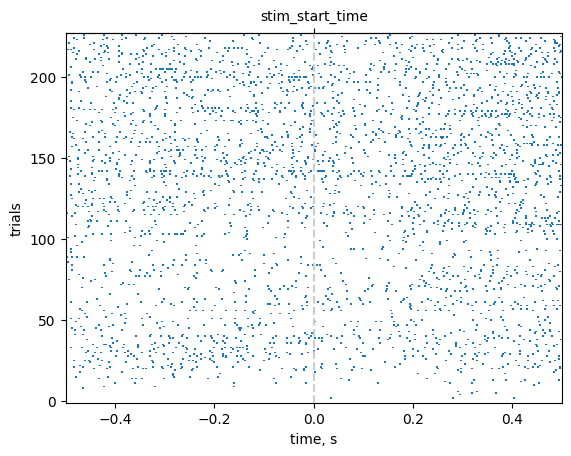

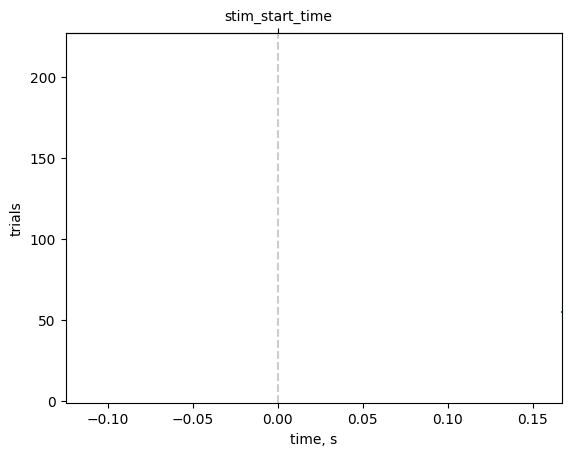

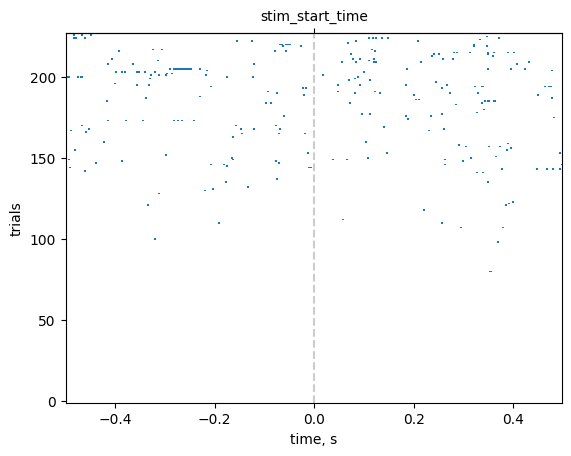

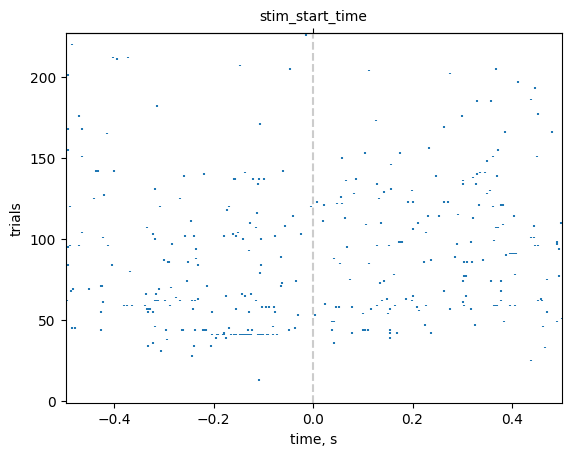

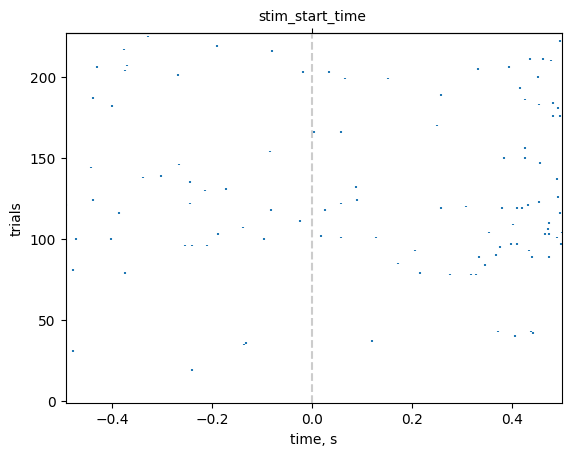

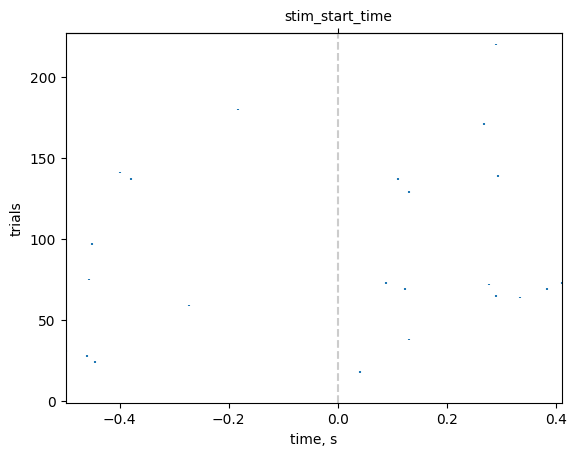

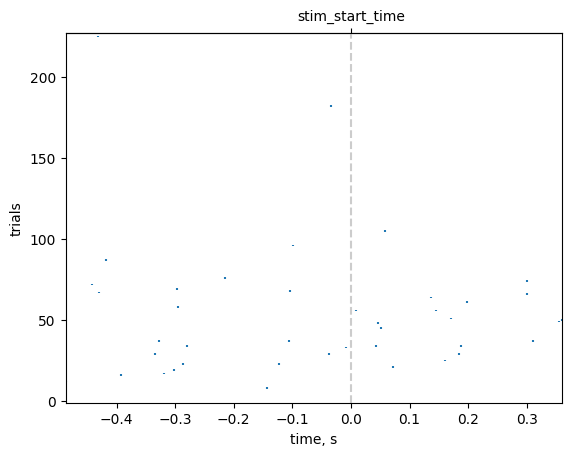

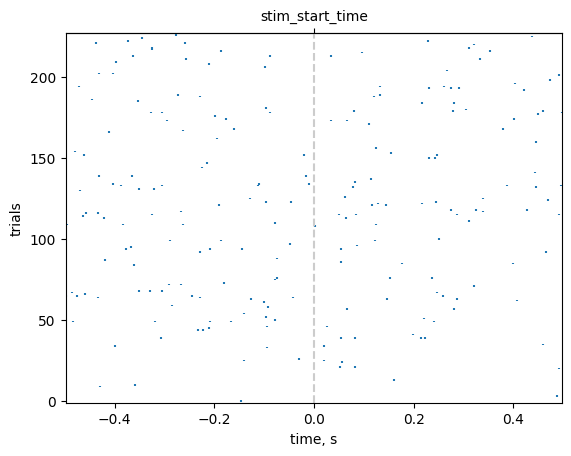

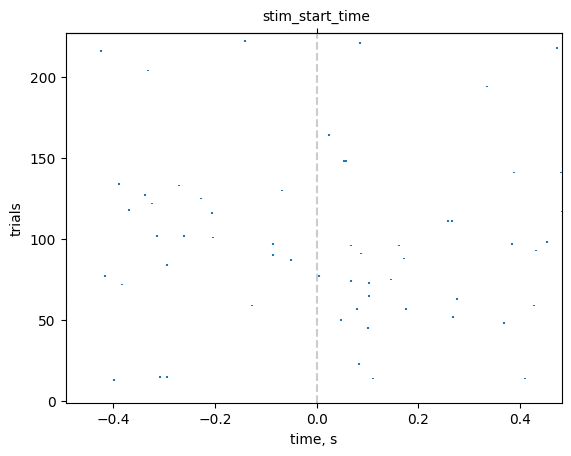

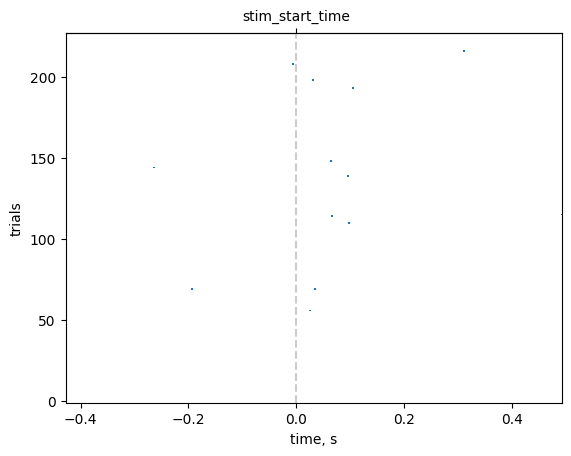

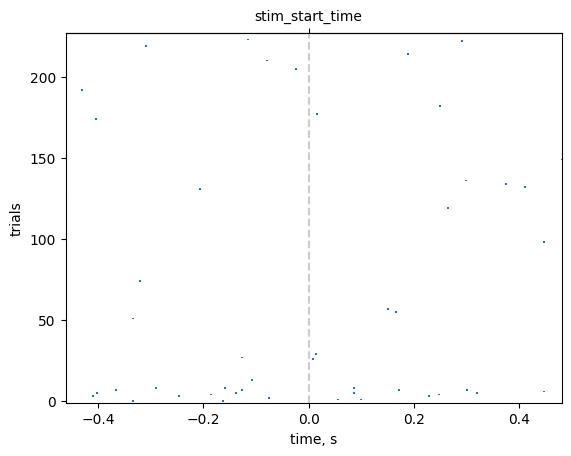

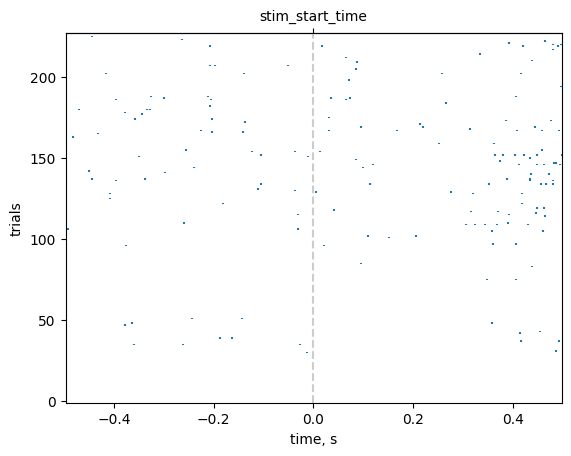

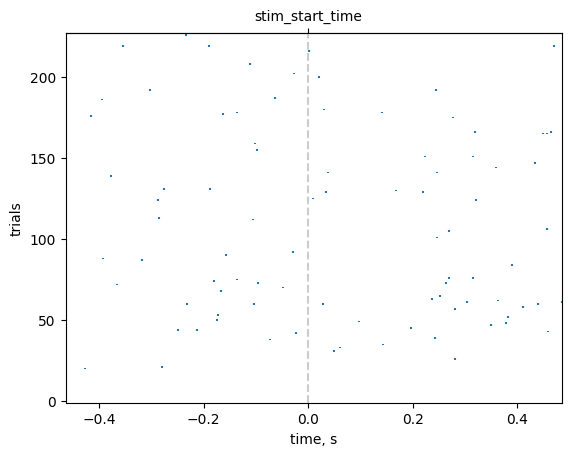

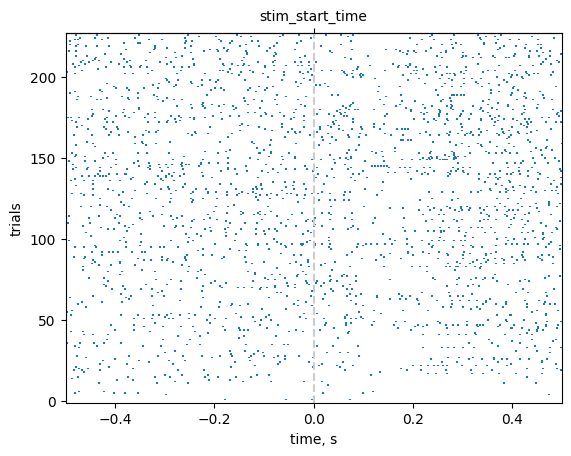

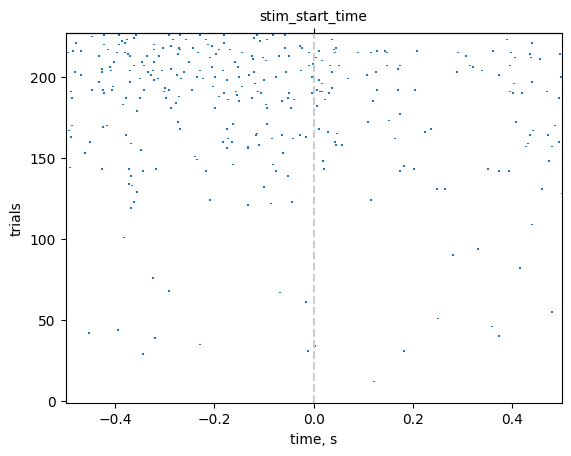

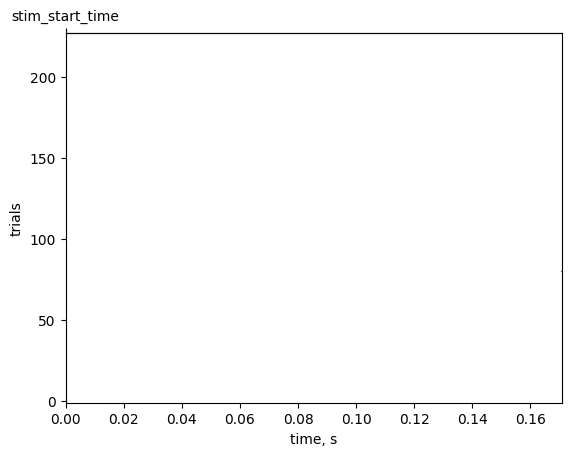

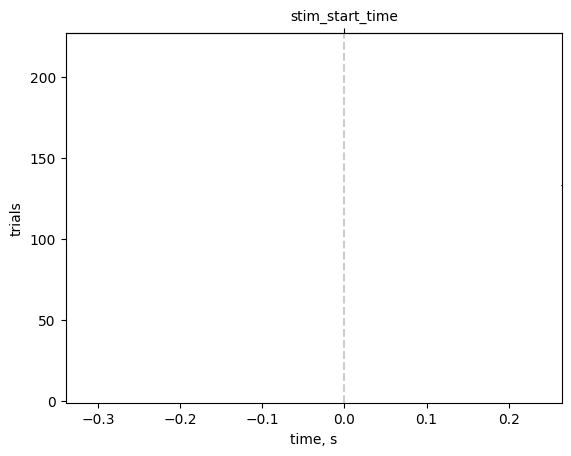

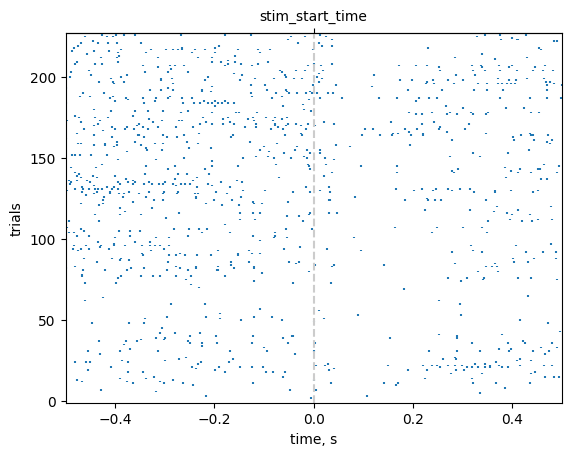

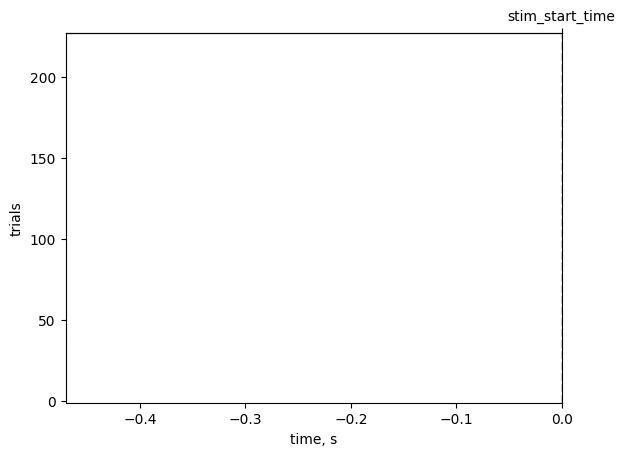

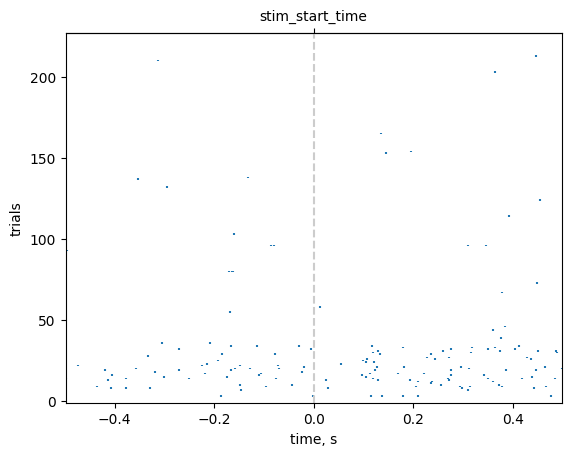

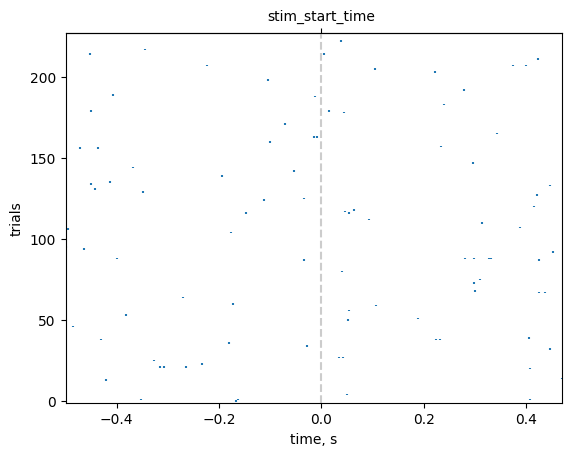

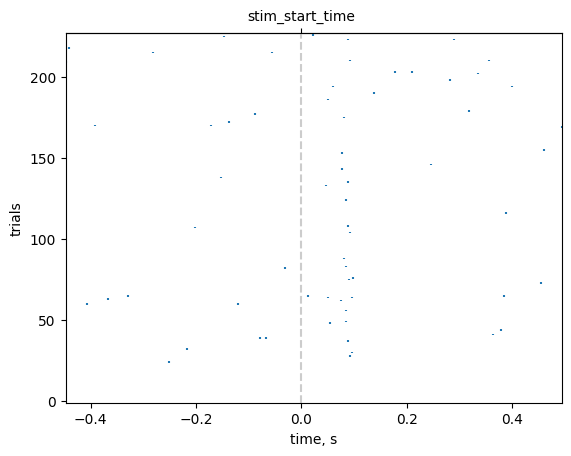

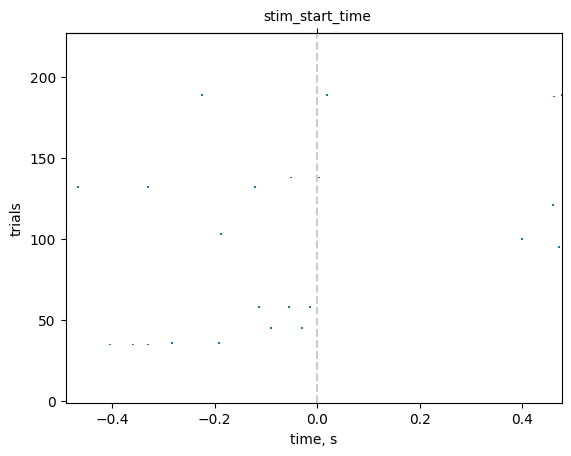

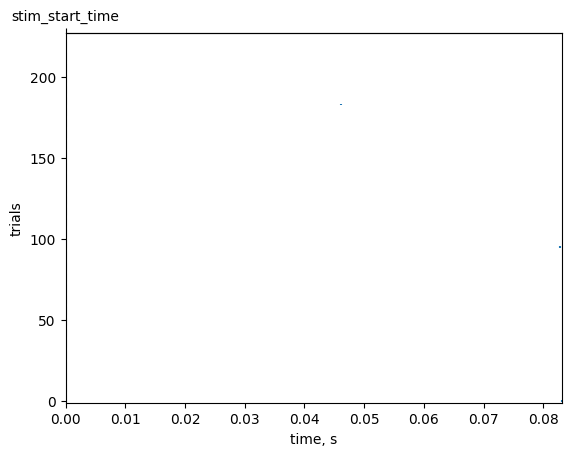

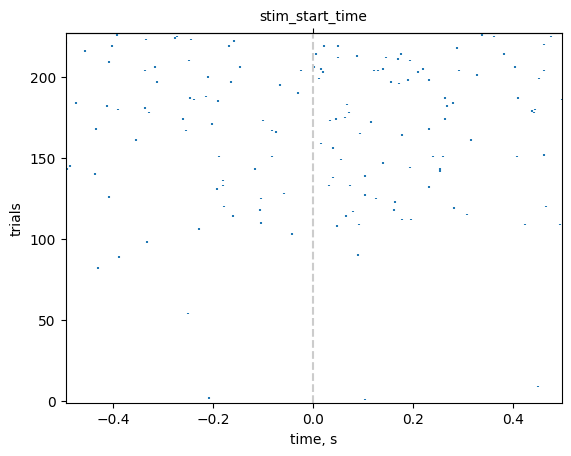

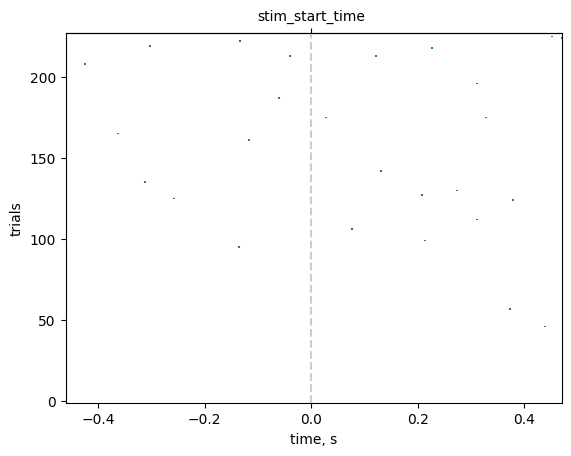

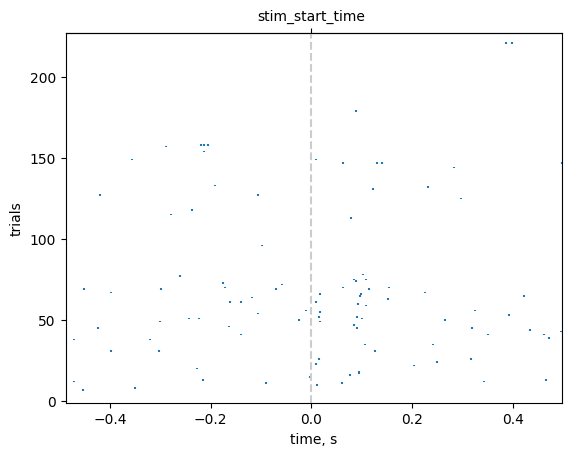

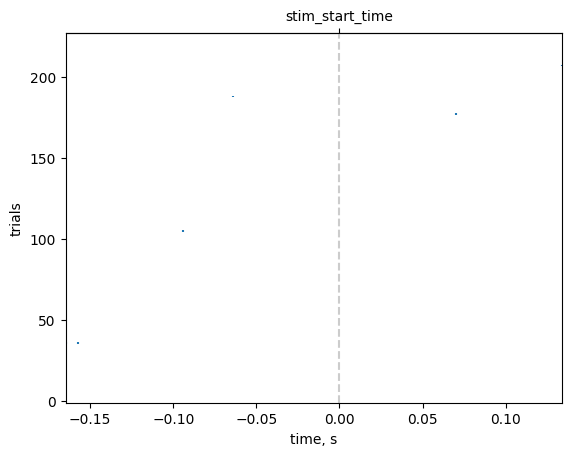

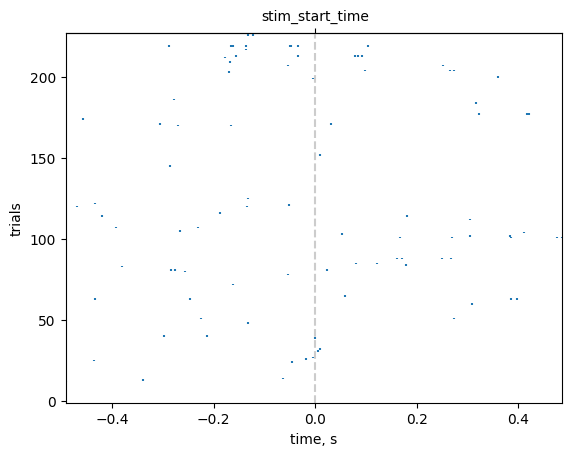

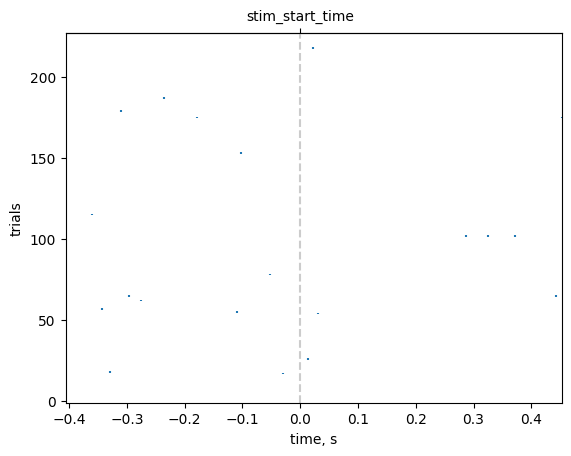

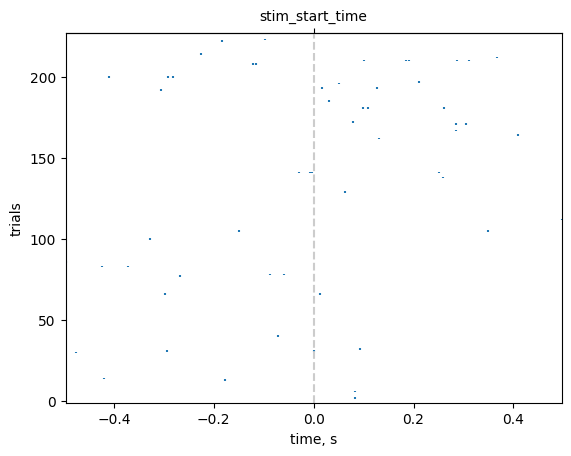

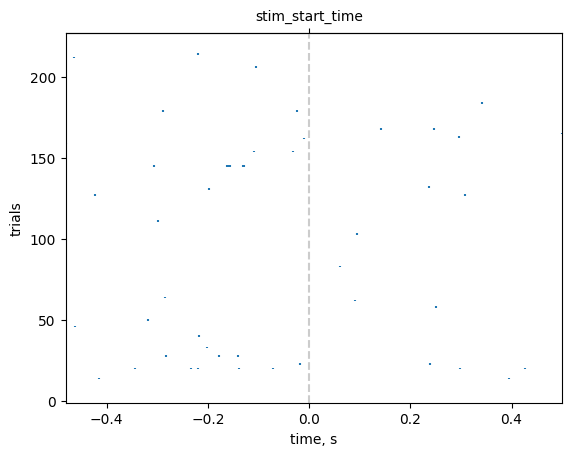

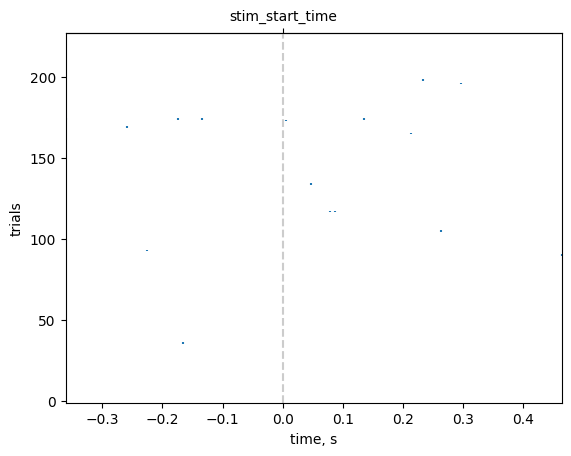

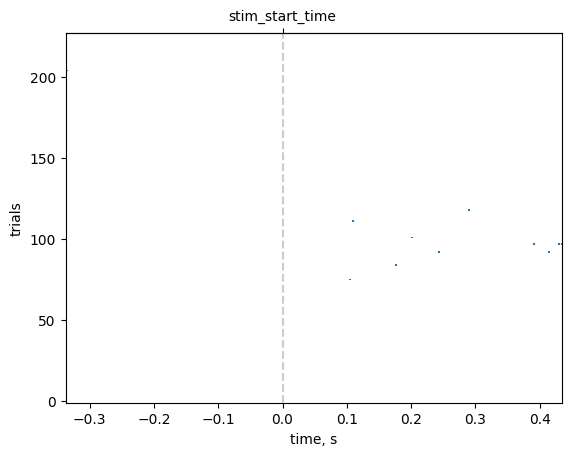

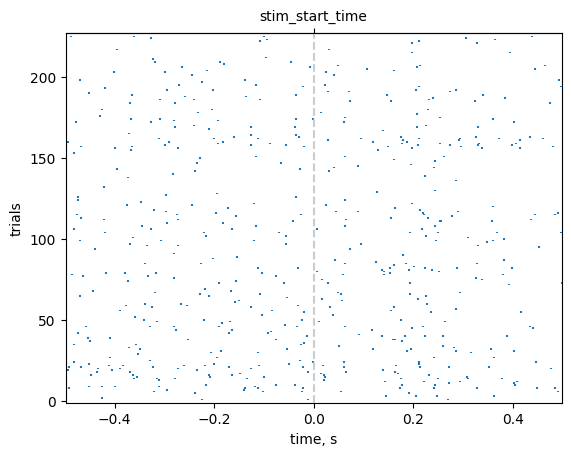

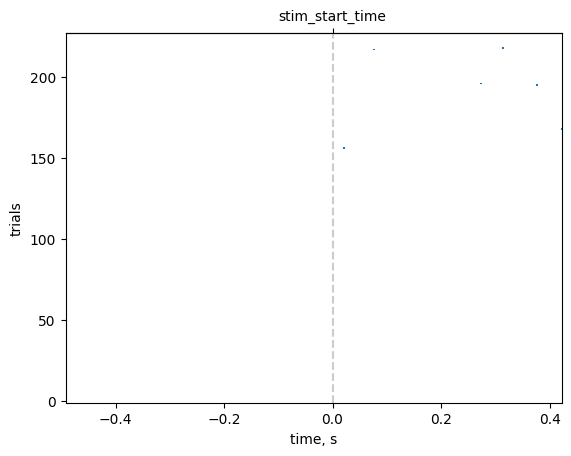

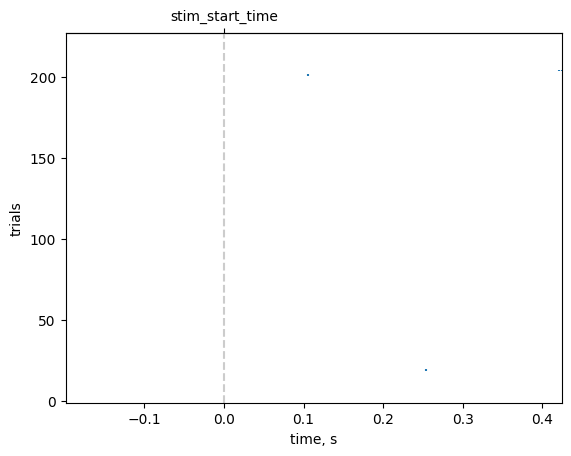

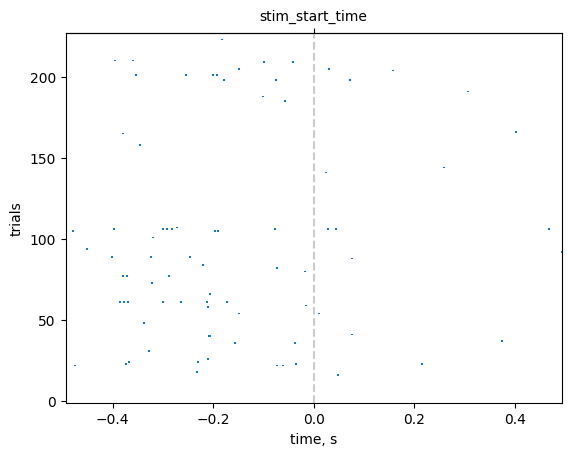

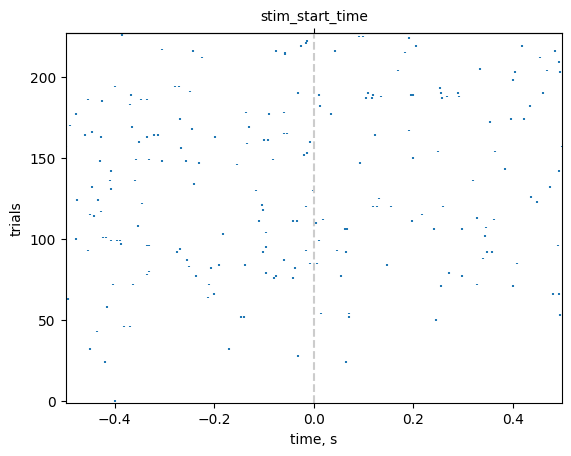

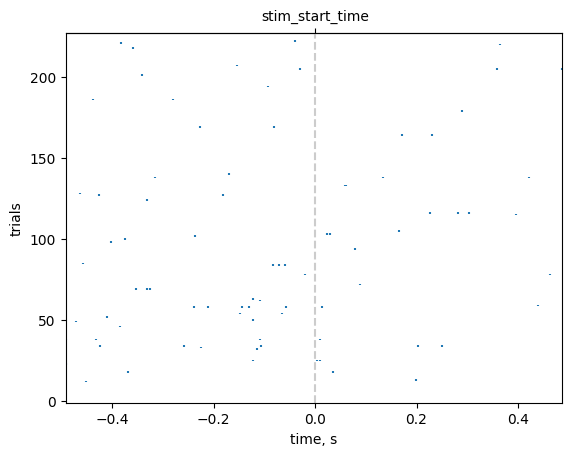

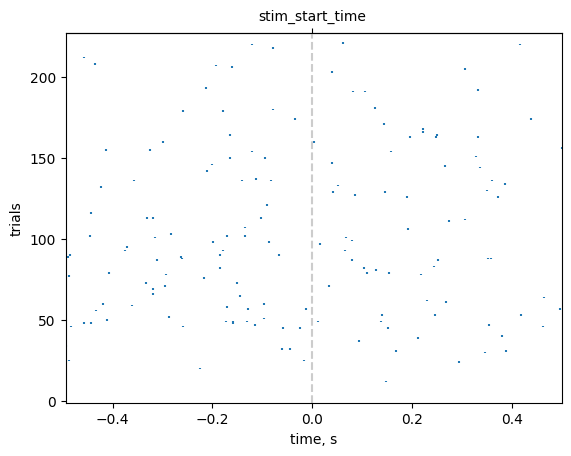

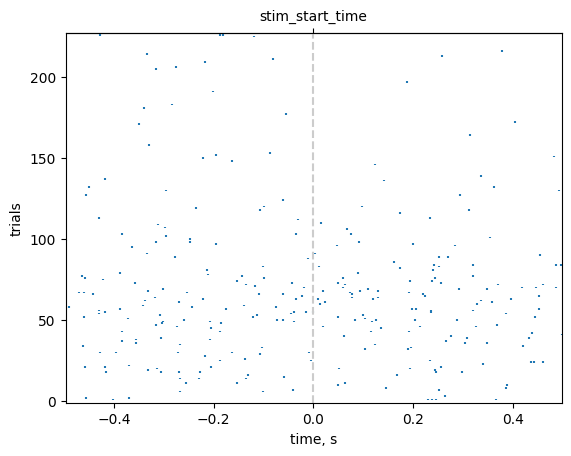

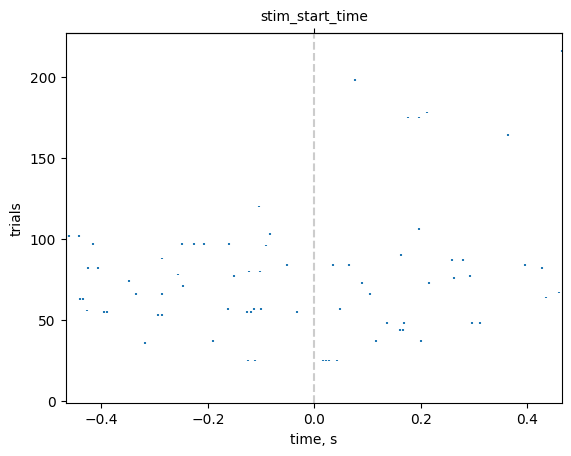

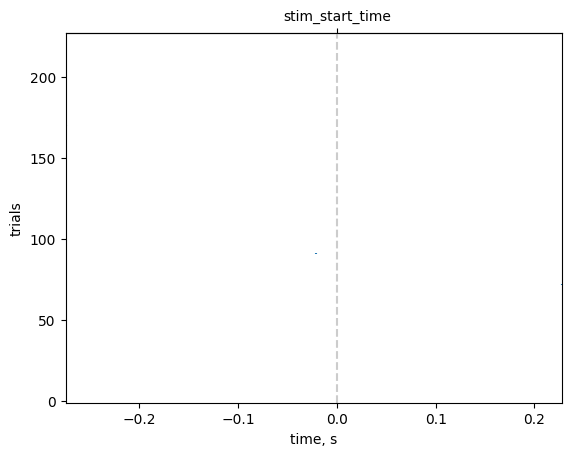

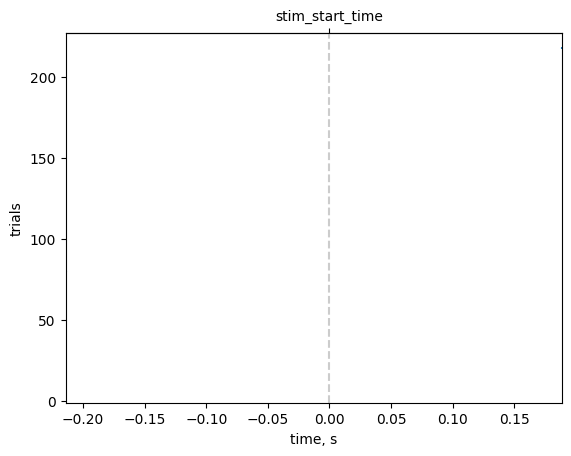

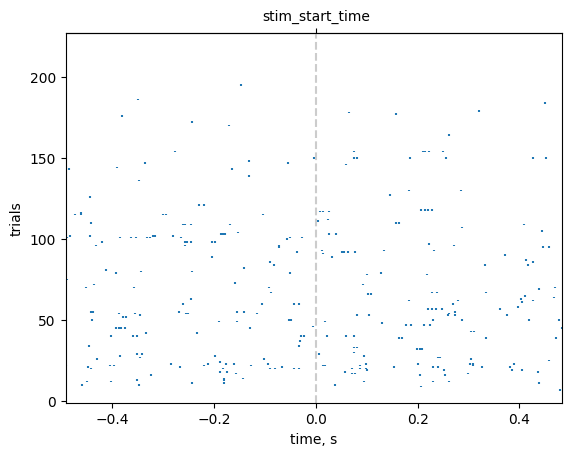

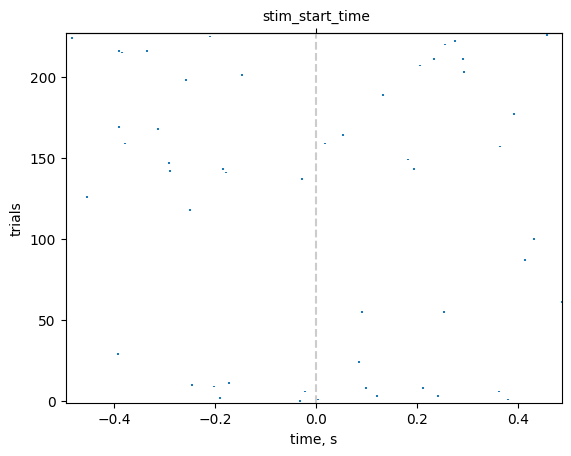

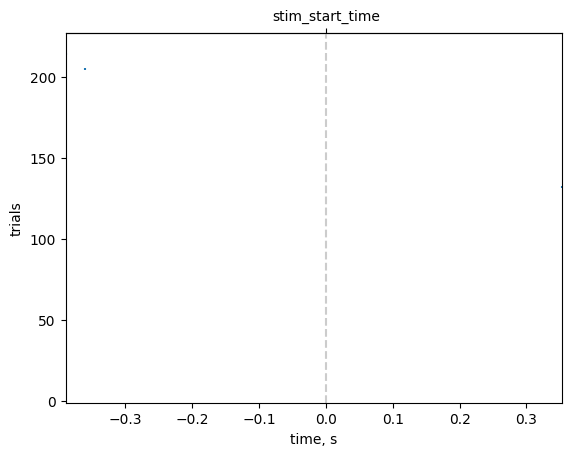

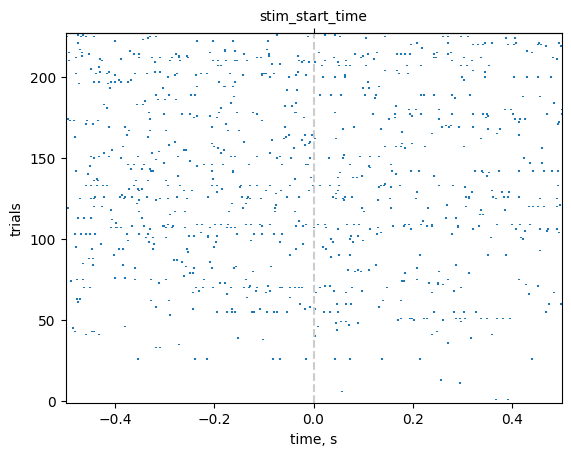

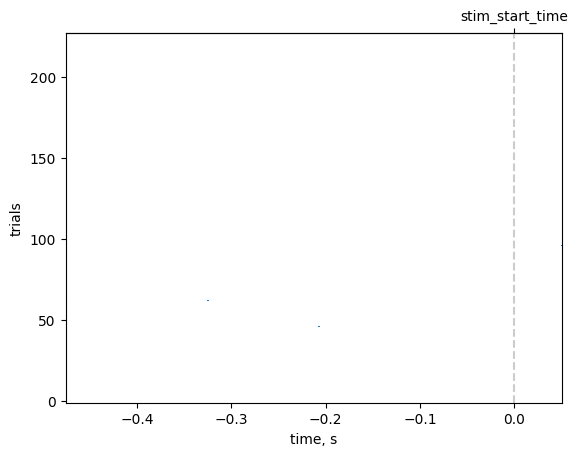

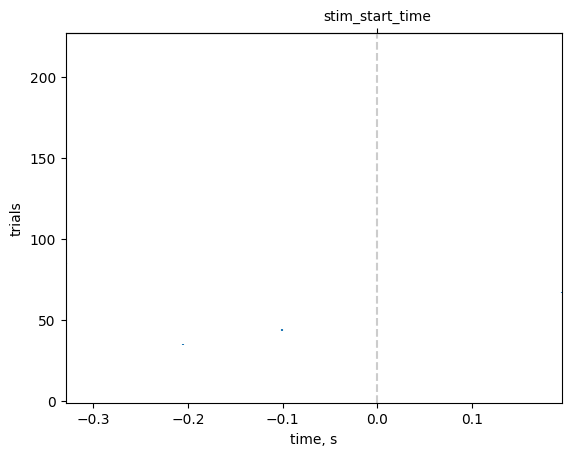

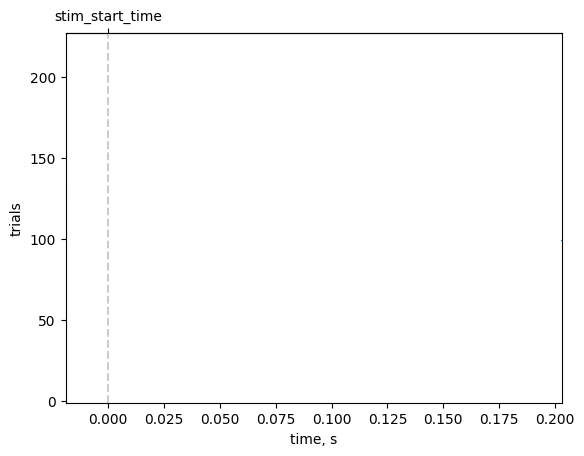

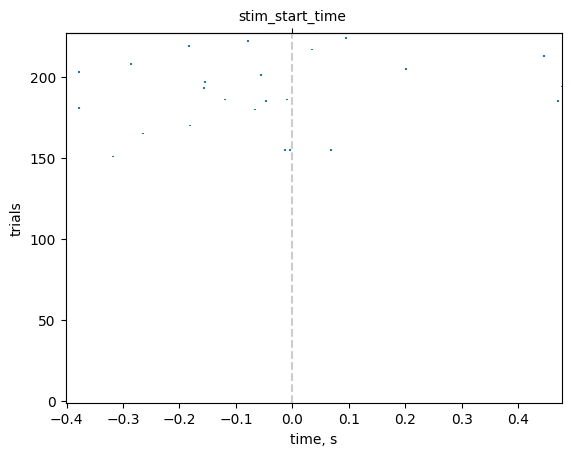

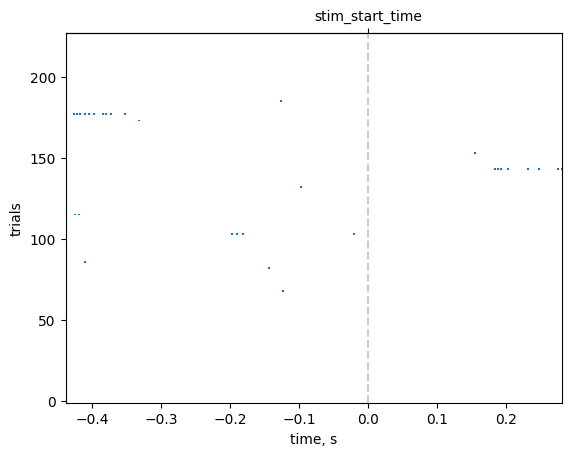

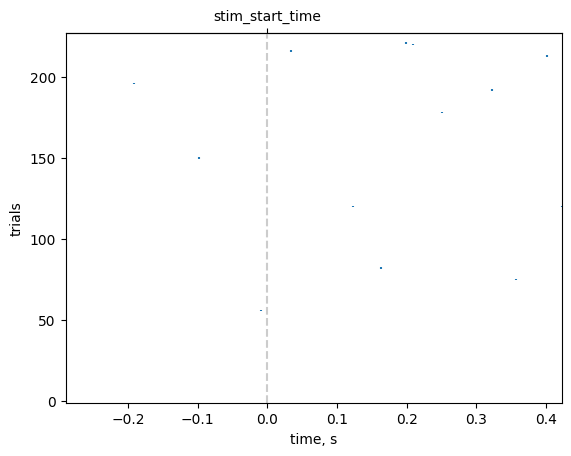

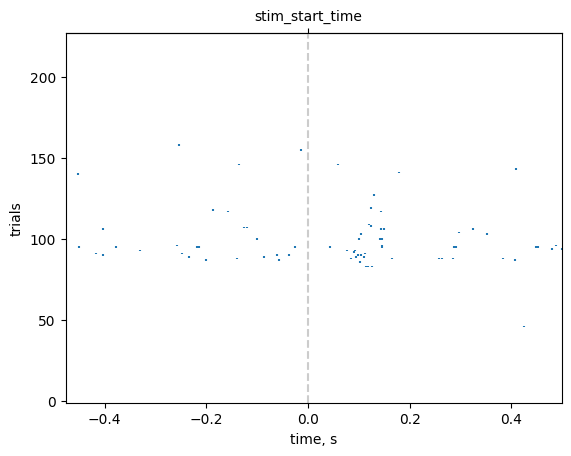

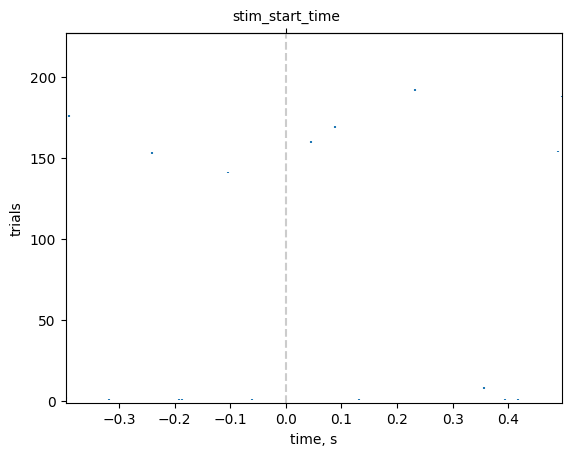

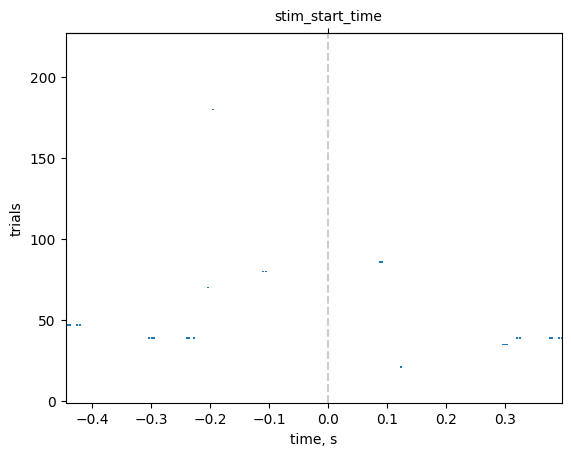

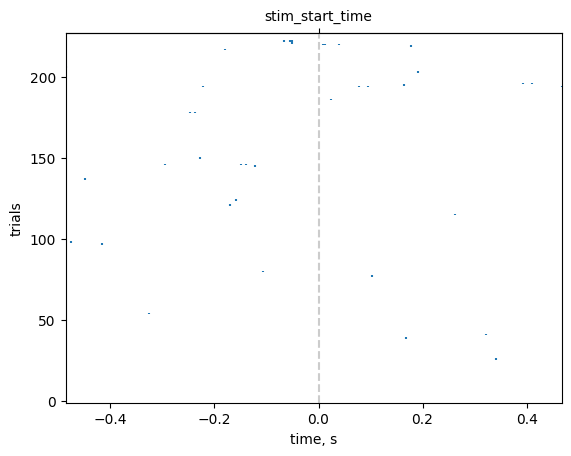

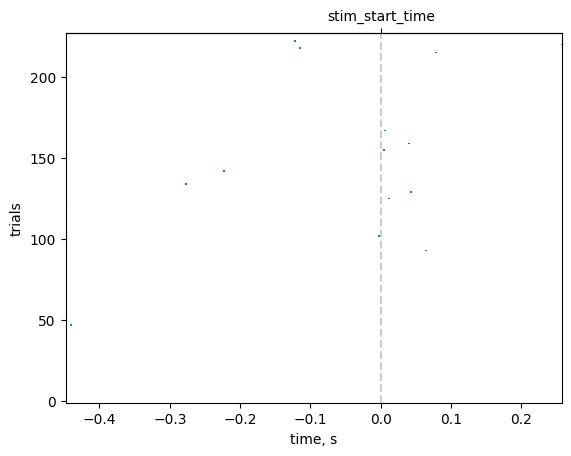

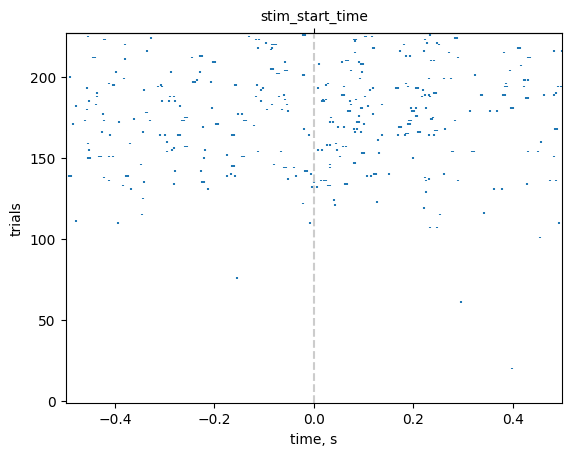

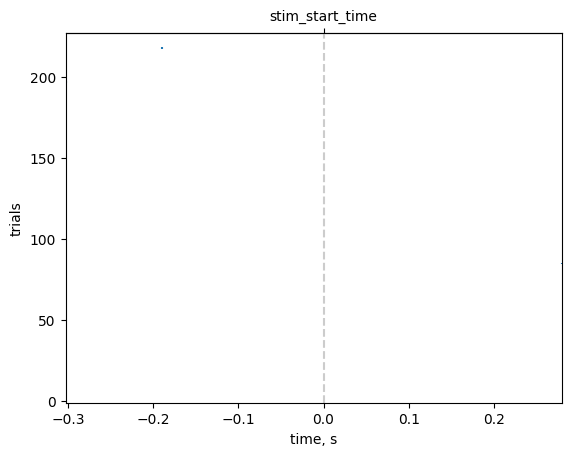

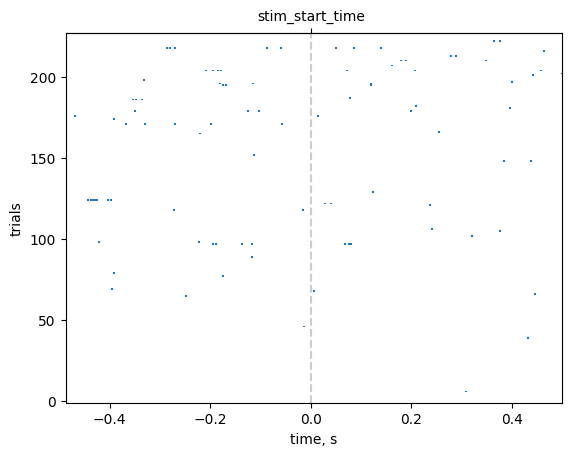

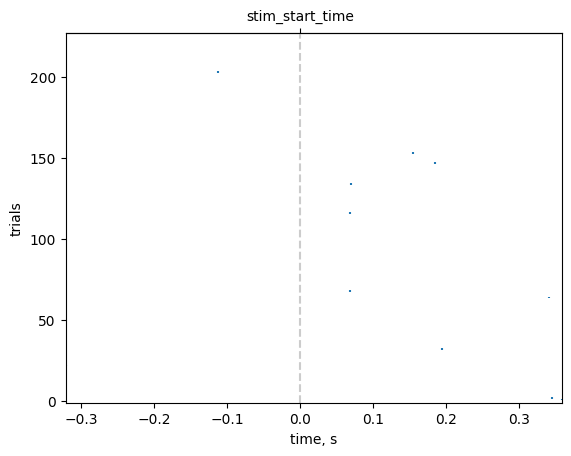

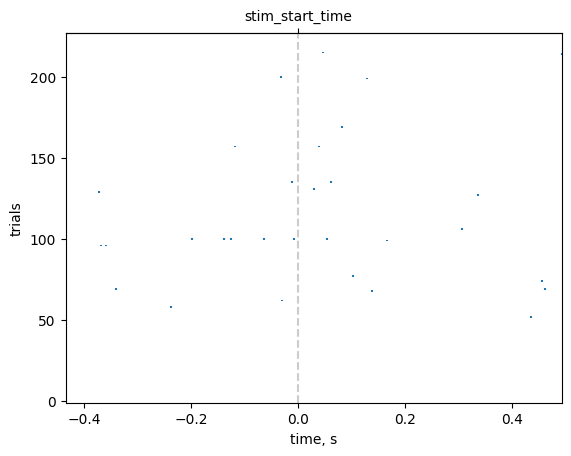

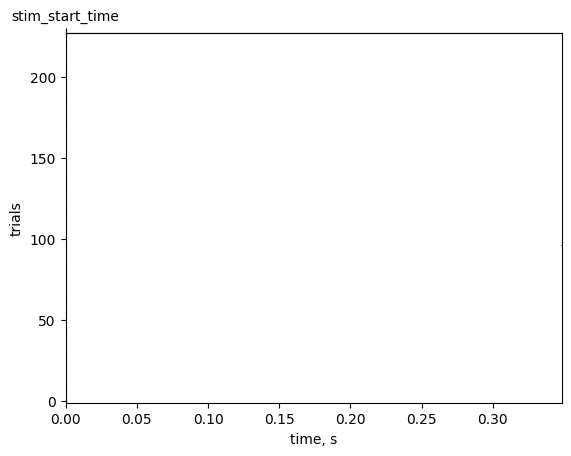

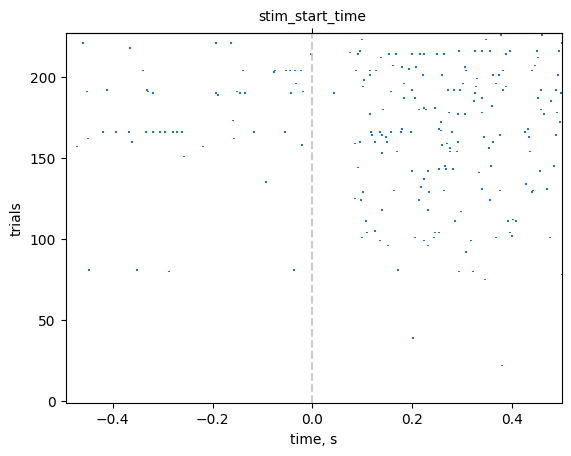

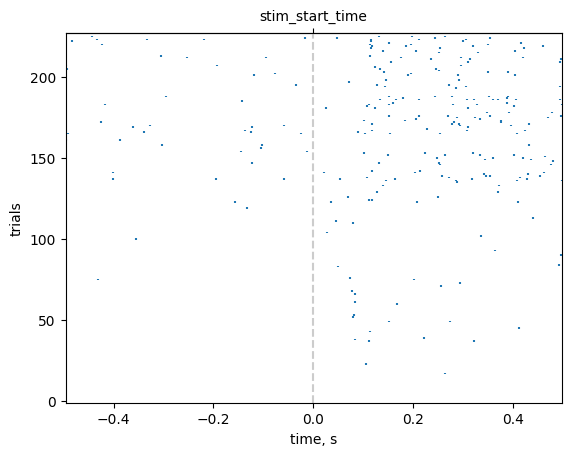

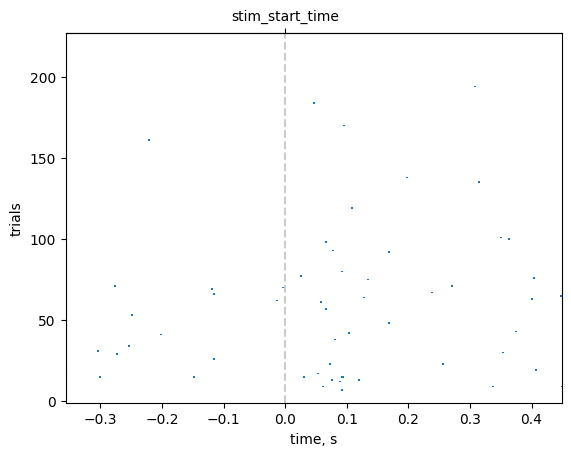

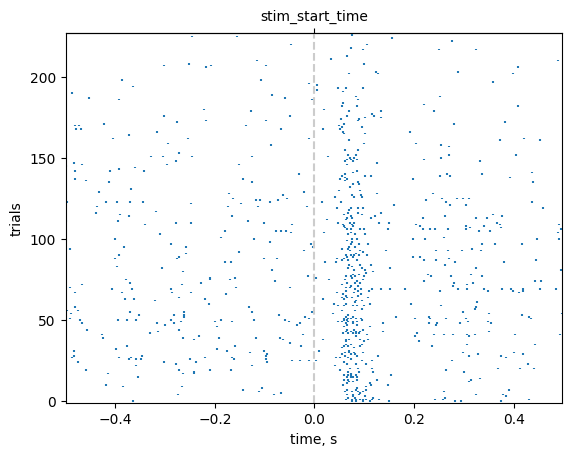

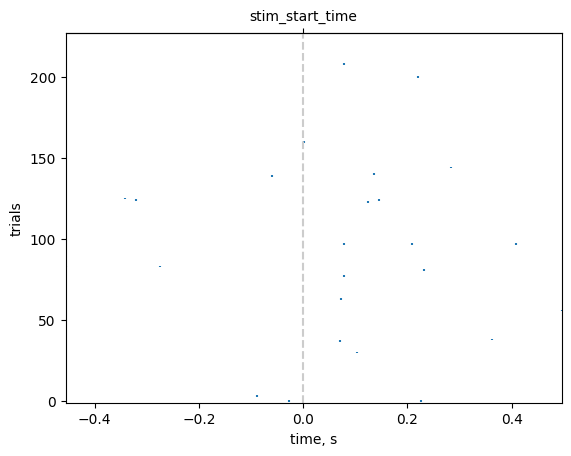

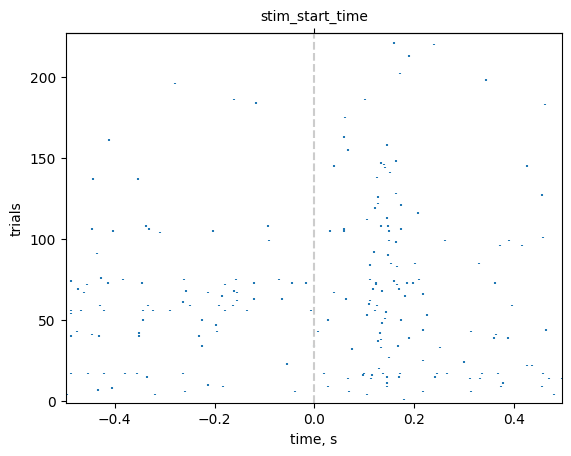

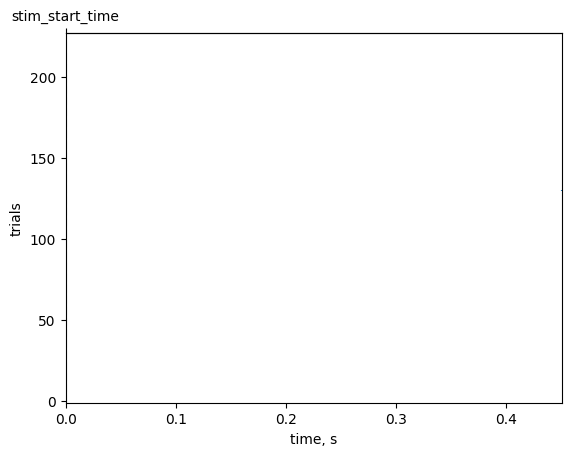

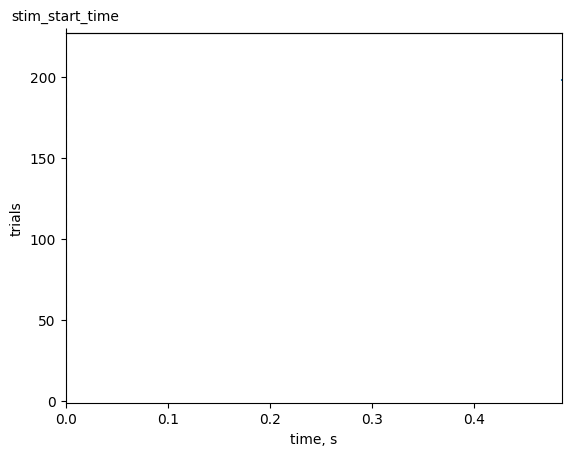

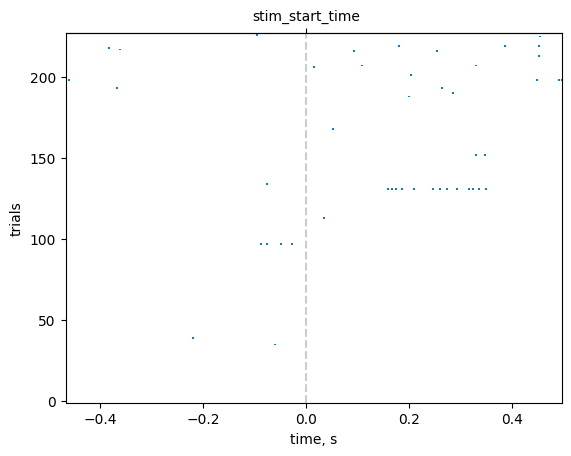

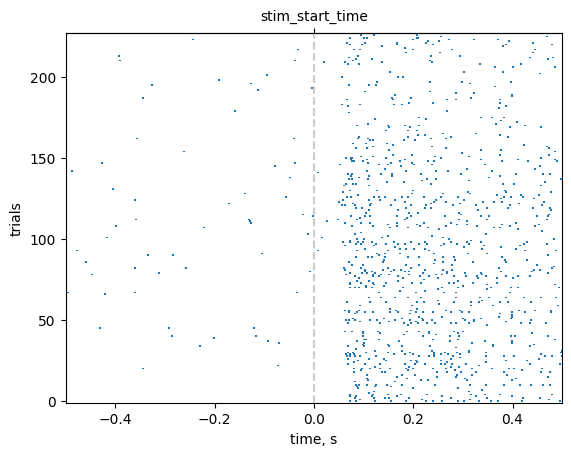

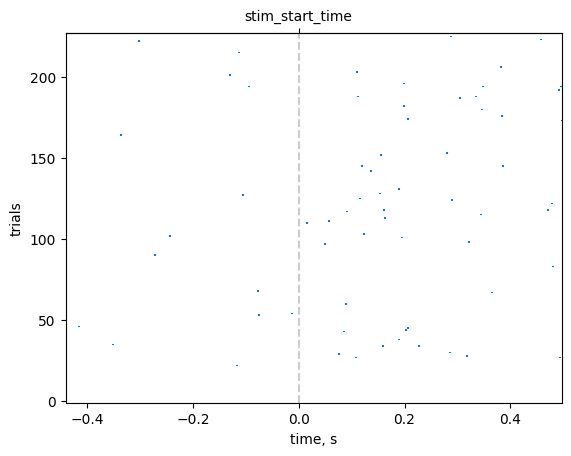

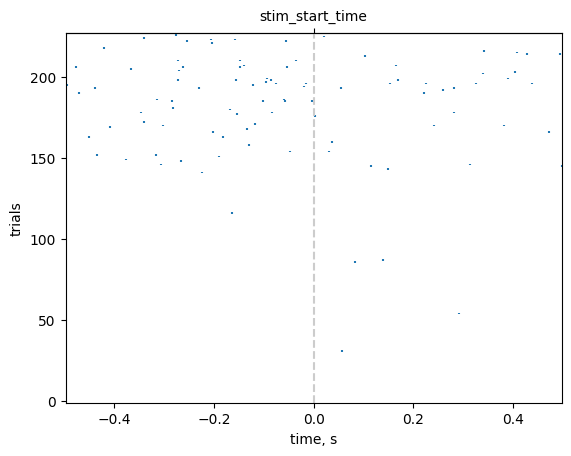

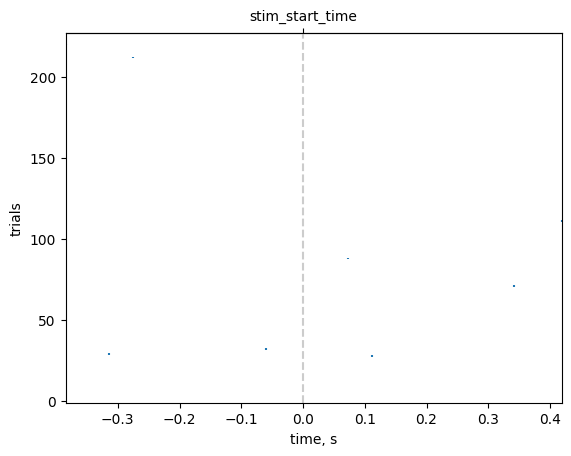

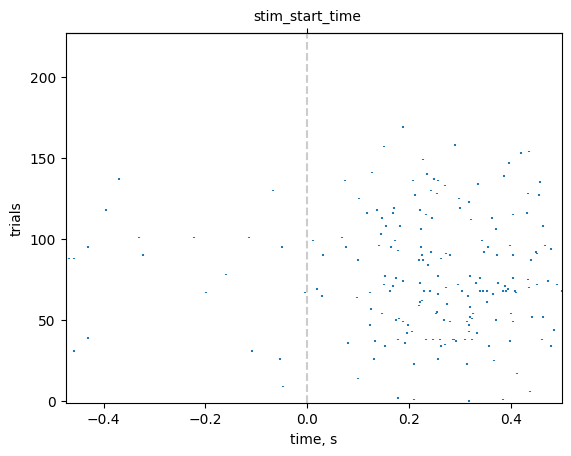

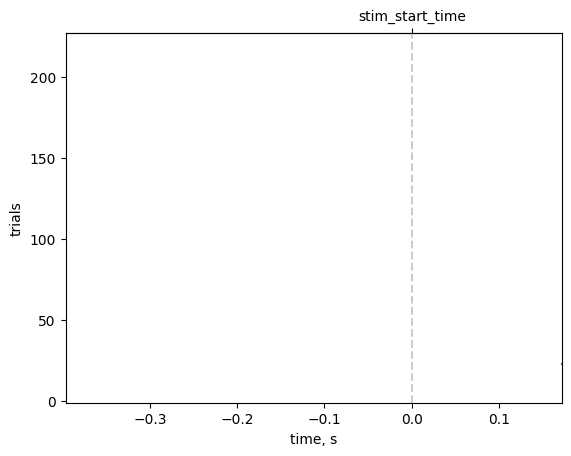

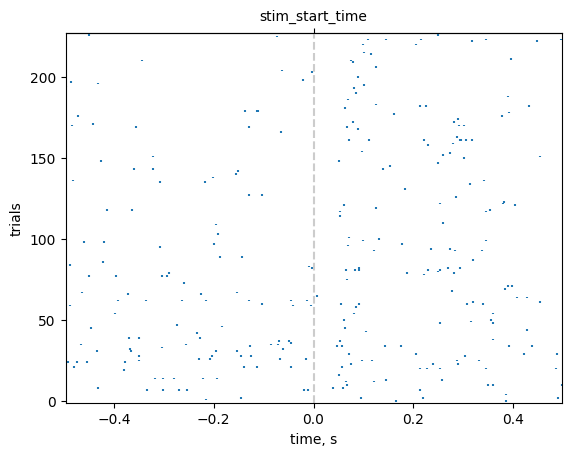

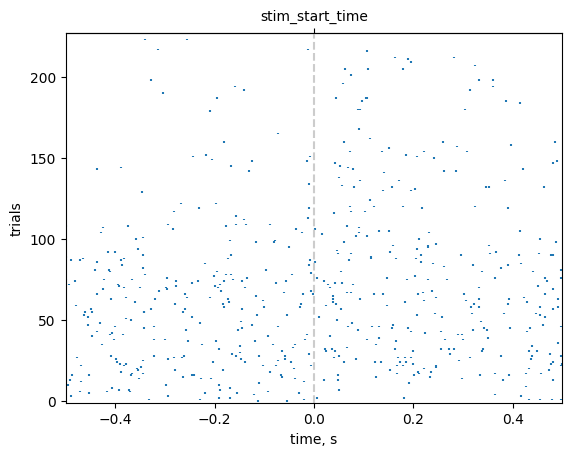

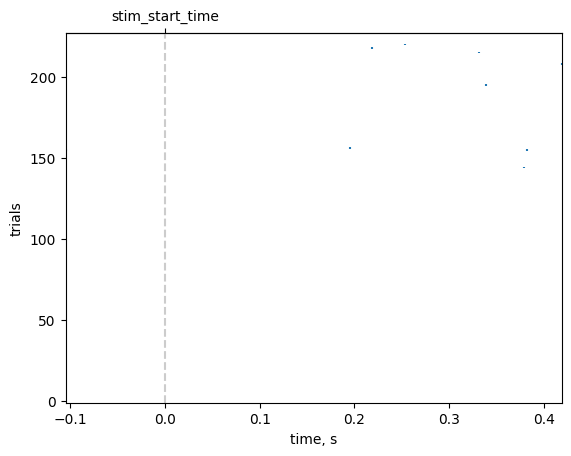

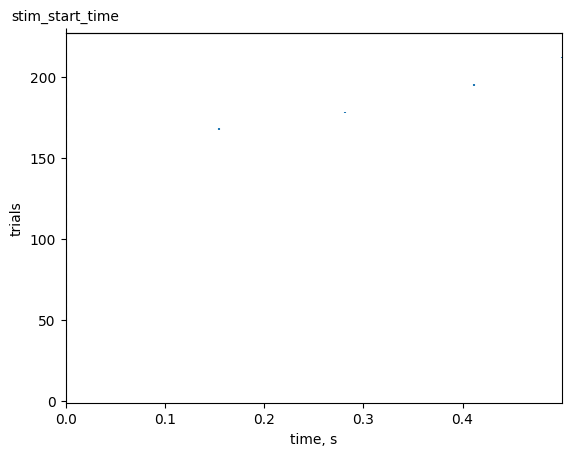

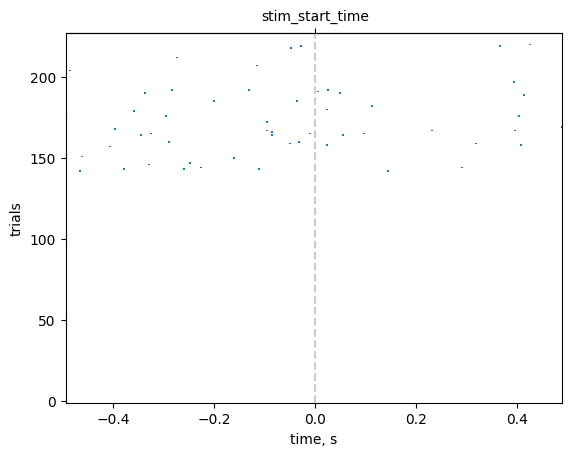

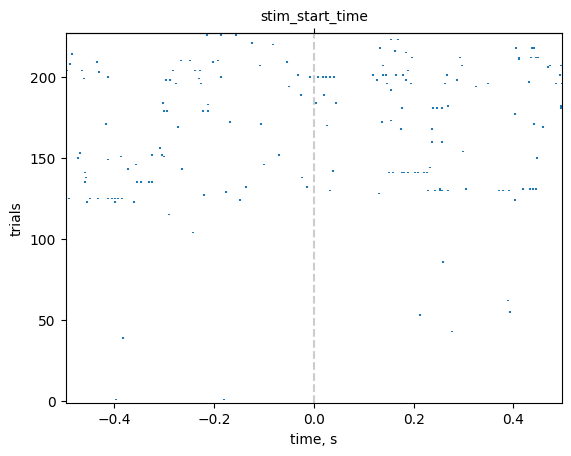

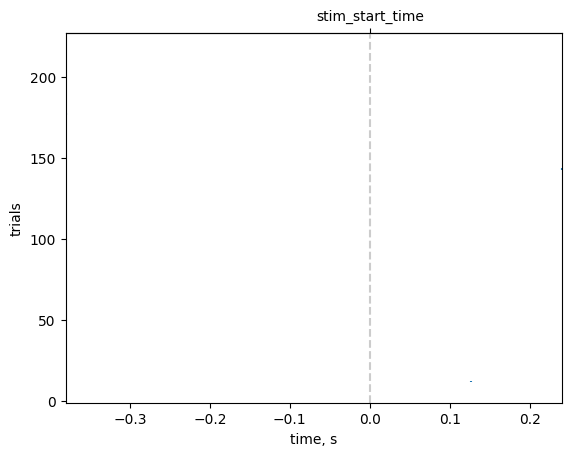

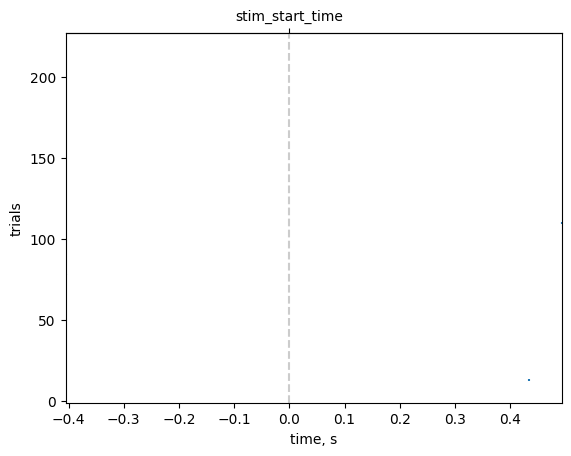

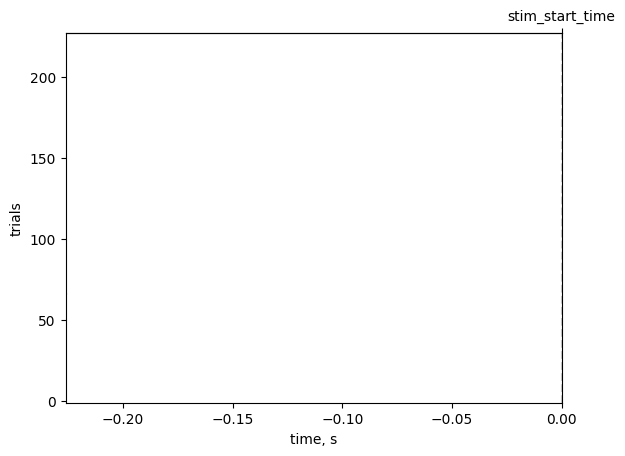

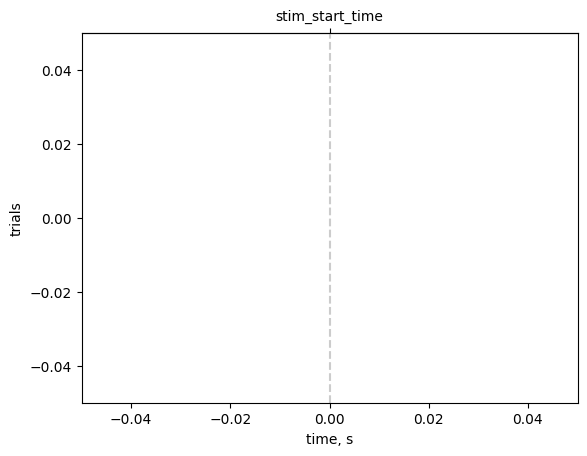

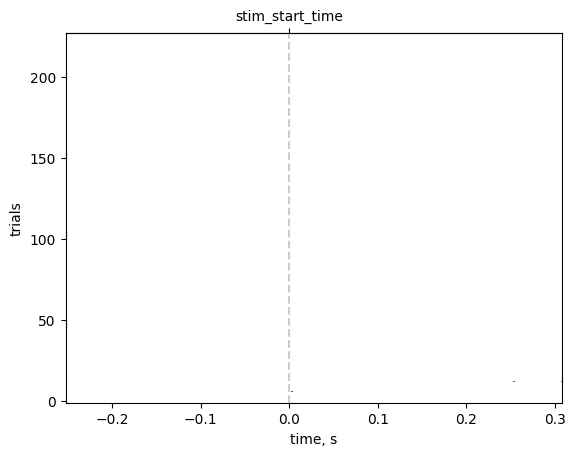

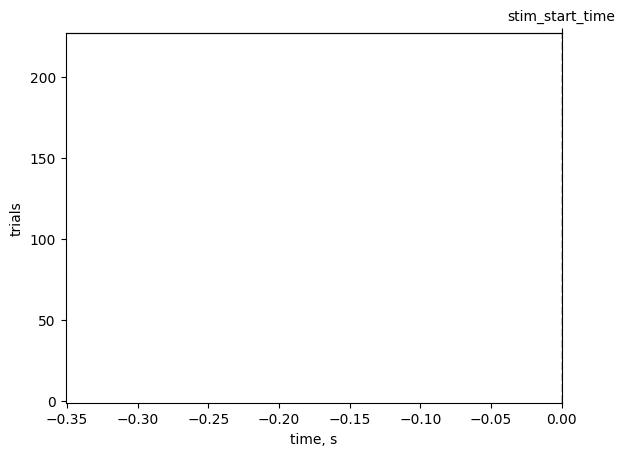

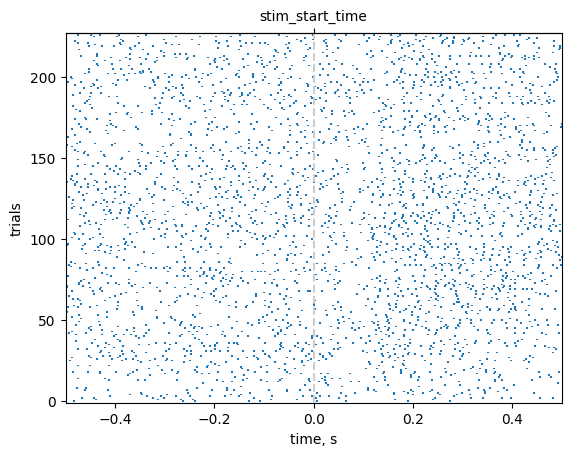

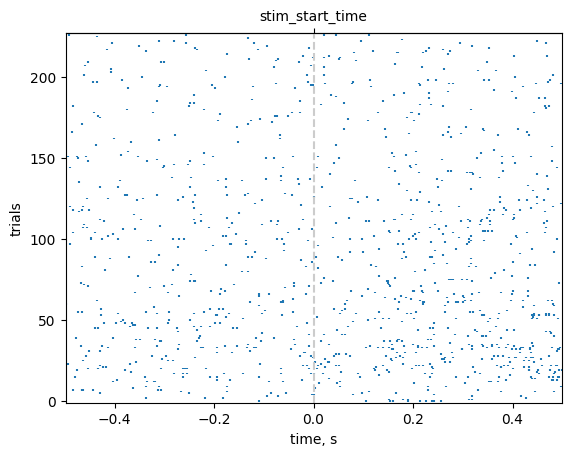

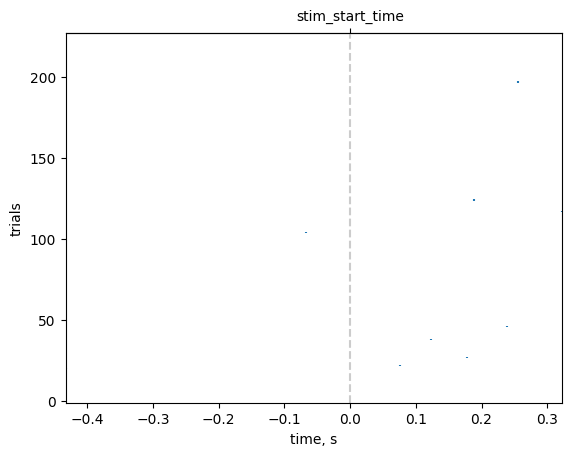

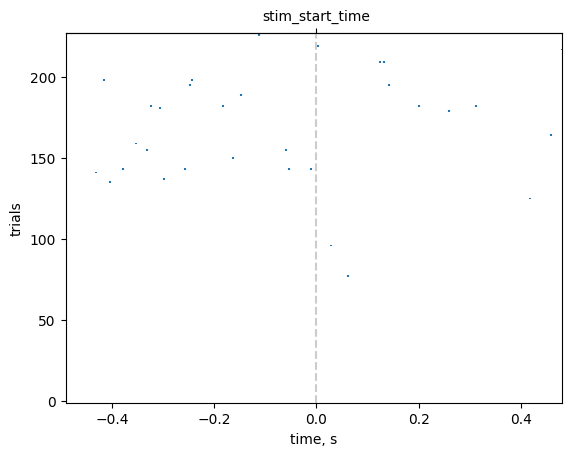

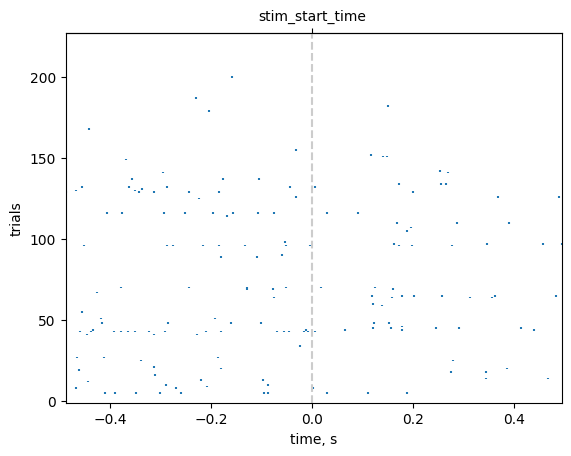

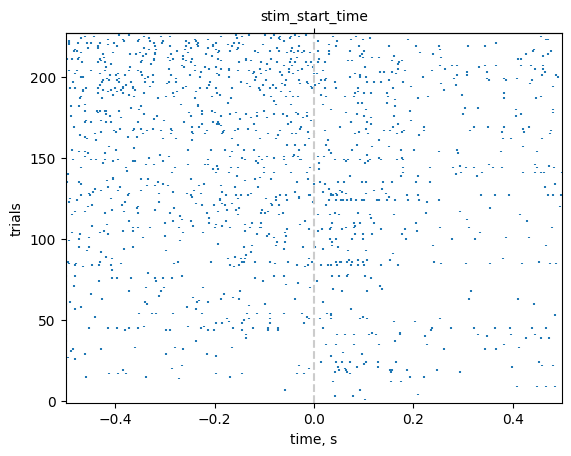

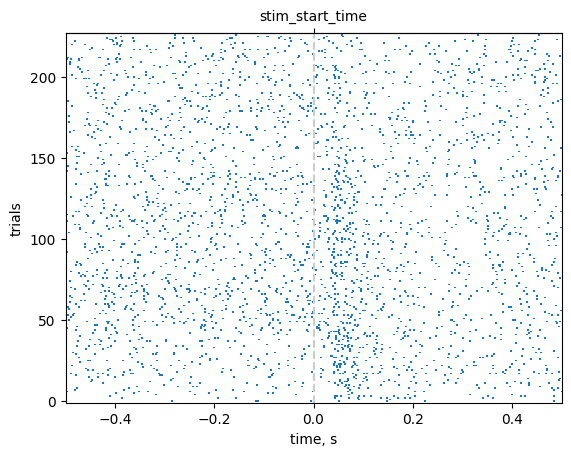

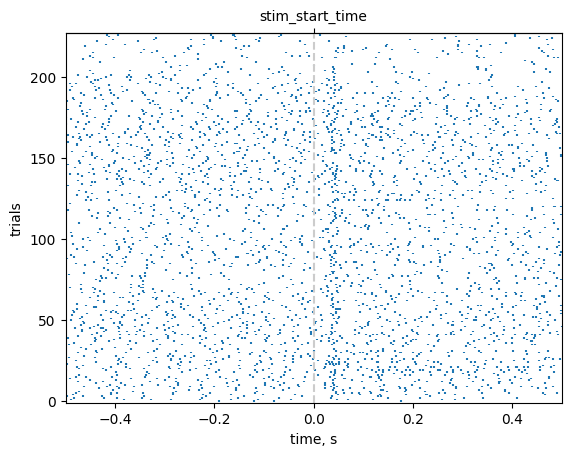

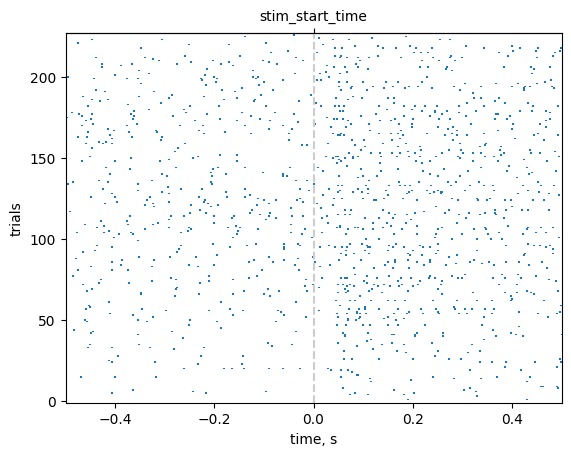

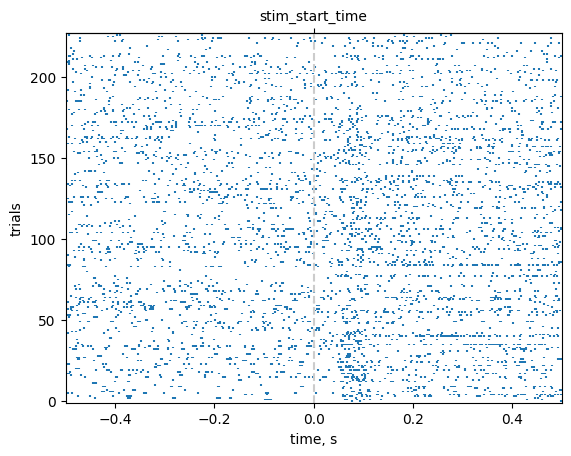

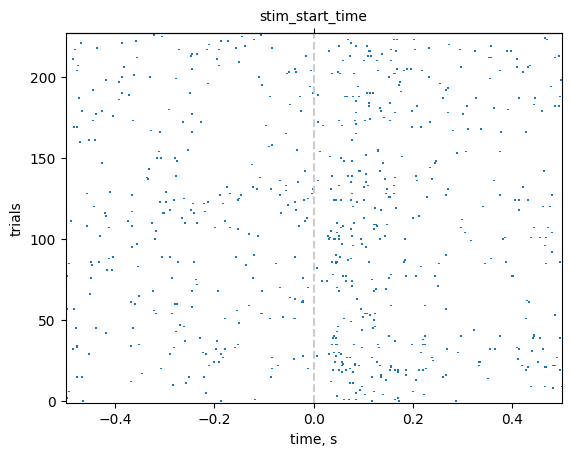

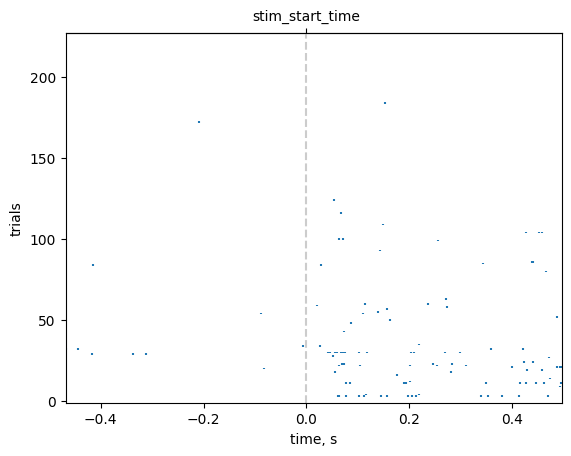

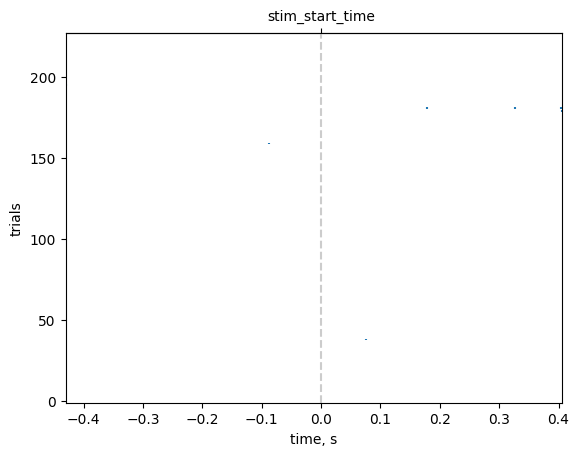

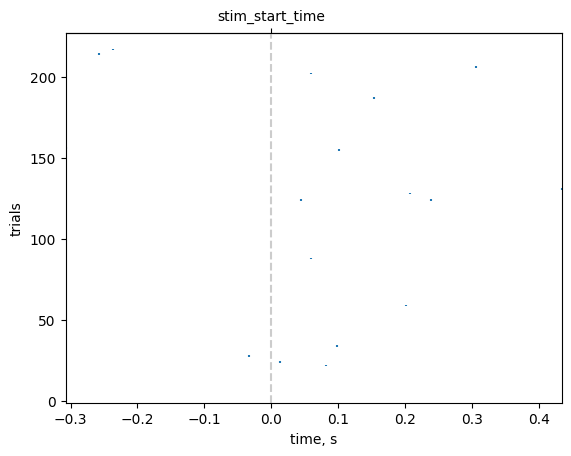

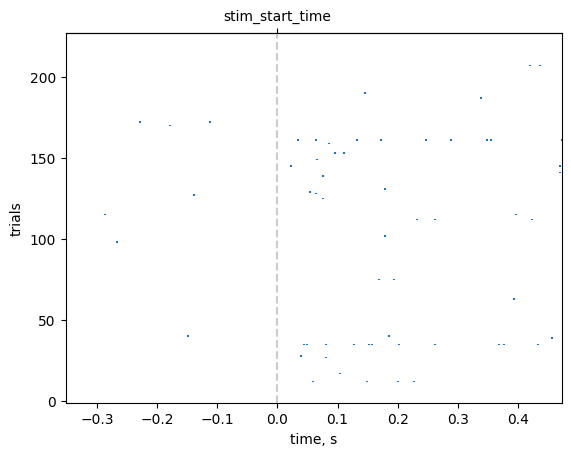

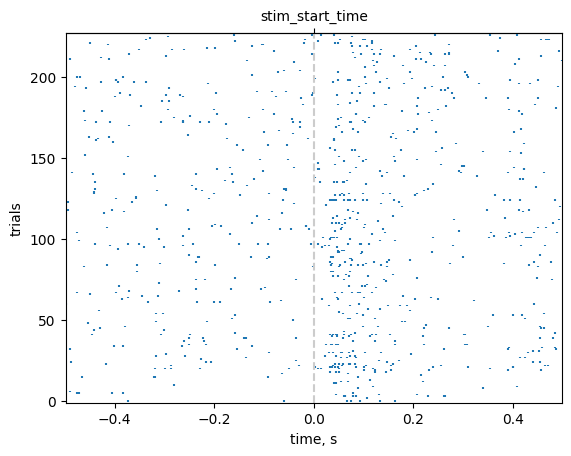

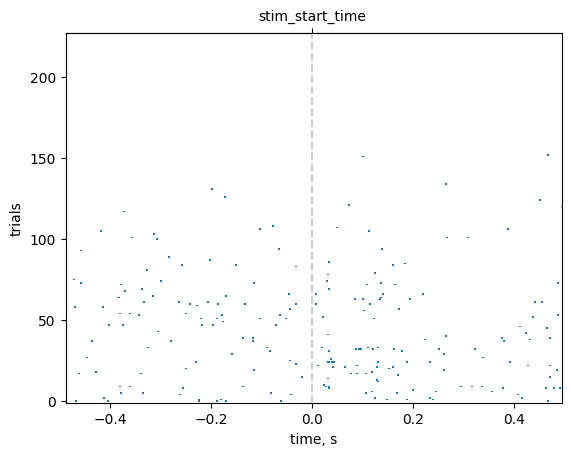

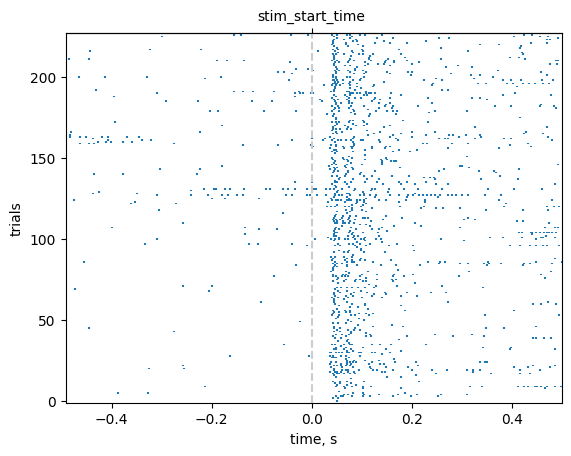

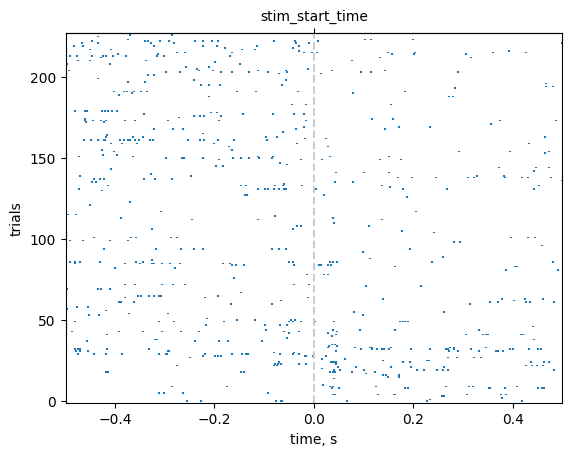

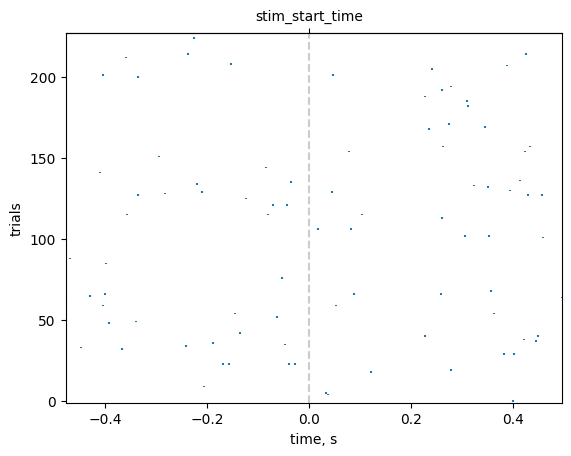

KeyboardInterrupt: 

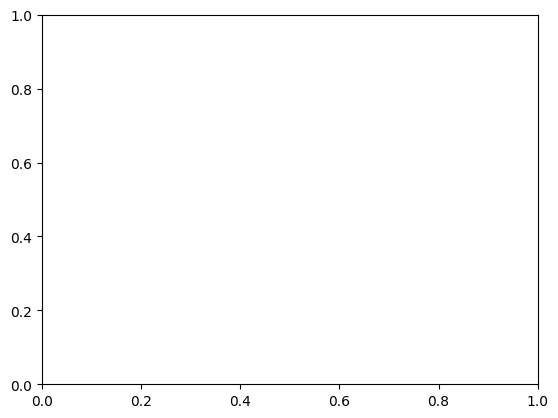

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random
import npc_sessions
import polars as pl

sessions = []
for s in npc_sessions.tracked:
    try:
        result = s.is_uploaded
    except ValueError:       
        continue
    else:
        if not result:
            continue
    try:
        _ = npc_sessions.get_units_electrodes(s.session)
    except (FileNotFoundError, TypeError, ValueError) as exc:
        print(f'{s.session}: {exc!r}')
    else:
        print(f'{s.session}: units available')
        sessions.append(npc_sessions.Session(s.session))



session = next(s for s in sessions if s.id == '626791_2022-08-17')




stim = next(s for s in session.stim_data if 'DynamicRouting' in s)
trials = npc_sessions.DynamicRouting1(session.stim_data[stim], session.sync_data)
df = npc_sessions.get_units_electrodes_spike_times(session.id)

vis = df.filter(pl.col('structure_acronym').str.contains('VIS'))
aud = df.filter(pl.col('structure_acronym').str.starts_with('AUD'))

for spike_times in vis['spike_times']:
# spike_times = vis[random.randrange(len(vis))]['spike_times'][0]

    pad_start = .5
    pad_end = .5
    # align_on = 'response_window_start_time'
    align_on_time = 'stim_start_time'
    on = trials.to_dataframe().query('is_vis_stim')[align_on_time].values - pad_start
    off = pad_start + on + pad_end

    fig, ax = plt.subplots()
    ax.eventplot(
        [spike_times[a:b] - on[idx] - pad_start 
        for idx, (a, b)
        in enumerate(zip(np.searchsorted(spike_times, on), np.searchsorted(spike_times, off)))]
    )
    ax.axvline(0, color=[.8]*3, linestyle='--')
    ax.set(xlabel='time, s', ylabel='trials', xmargin=0, ymargin=0)
    ax2 = ax.secondary_xaxis('top')
    ax2.set(xticks=[0], xticklabels=[align_on_time]);
    plt.show()